## **Importing Important Libaries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.svm import SVC

# Additional imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV, cross_validate

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
pip install --upgrade numexpr

In [ ]:
pip install --upgrade bottleneck

## **Data Overview**

In [ ]:
# Step 1: Data Loading and Understanding

df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
pip install --upgrade openpyxl

In [ ]:
df.shape

(5630, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [ ]:
# columns to list
columns = df.columns.to_list()
columns

['CustomerID',
 'Churn',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [ ]:
df.select_dtypes(exclude=np.number).columns

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [ ]:
df.describe(include='O').style.background_gradient(axis=None , cmap = "Blues" , vmin = 0 , vmax = 9000  )

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [ ]:
# Show the unique values on each column.
for col in df.columns:
    if df[col].dtype == object:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("________________________________________________________________________________")

PreferredLoginDevice : ['Mobile Phone' 'Phone' 'Computer']
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
________________________________________________________________________________
PreferredPaymentMode : ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
________________________________________________________________________________
Gender : ['Female' 'Male']
Male      3384
Female    2246
Name: Gender, dtype: int64
________________________________________________________________________________
PreferedOrderCat : ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile             

In [ ]:
df.select_dtypes(include=np.number).columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
df.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.000000,52815.500000,1625.385339,50001.000000,51408.250000,52815.500000,54222.750000,55630.000000
Churn,5630.000000,0.168384,0.374240,0.000000,0.000000,0.000000,0.000000,1.000000
Tenure,5366.000000,10.189899,8.557241,0.000000,2.000000,9.000000,16.000000,61.000000
CityTier,5630.000000,1.654707,0.915389,1.000000,1.000000,1.000000,3.000000,3.000000
WarehouseToHome,5379.000000,15.639896,8.531475,5.000000,9.000000,14.000000,20.000000,127.000000
HourSpendOnApp,5375.000000,2.931535,0.721926,0.000000,2.000000,3.000000,3.000000,5.000000
NumberOfDeviceRegistered,5630.000000,3.688988,1.023999,1.000000,3.000000,4.000000,4.000000,6.000000
SatisfactionScore,5630.000000,3.066785,1.380194,1.000000,2.000000,3.000000,4.000000,5.000000
NumberOfAddress,5630.000000,4.214032,2.583586,1.000000,2.000000,3.000000,6.000000,22.000000
Complain,5630.000000,0.284902,0.451408,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
for col in df.columns:
    if df[col].dtype == float or df[col].dtype == int:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("________________________________________________________________________________")

CustomerID : [50001 50002 50003 ... 55628 55629 55630]
50001    1
53751    1
53759    1
53758    1
53757    1
        ..
51876    1
51875    1
51874    1
51873    1
55630    1
Name: CustomerID, Length: 5630, dtype: int64
________________________________________________________________________________
Churn : [1 0]
0    4682
1     948
Name: Churn, dtype: int64
________________________________________________________________________________
Tenure : [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1


In [ ]:
#As mobile phone and phone are both same so we have merged them
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

In [ ]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

In [ ]:
#as cod is also cash on delievery
#as cc is also credit card so i merged them
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'   # uses loc function
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

In [ ]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

In [ ]:
# convert num_cols to categories
df2 = df.copy()
for col in df2.columns:
  if col == 'CustomerID':
    continue

  else:
    if df2[col].dtype == 'int':
      df2[col] = df[col].astype(str)

df2.dtypes

CustomerID                       int64
Churn                           object
Tenure                         float64
PreferredLoginDevice            object
CityTier                        object
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered        object
PreferedOrderCat                object
SatisfactionScore               object
MaritalStatus                   object
NumberOfAddress                 object
Complain                        object
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [ ]:
# Categorical cols after Converting
df2.describe(include='O').style.background_gradient(axis=None , cmap = "Blues" , vmin = 0 , vmax = 9000  )

,Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain
count,5630,5630,5630,5630,5630,5630,5630,5630,5630,5630,5630
unique,2,2,3,5,2,6,5,5,3,15,2
top,0,Mobile Phone,1,Debit Card,Male,4,Mobile Phone,3,Married,2,0
freq,4682,3996,3666,2314,3384,2377,2080,1698,2986,1369,4026


In [ ]:
# Numerical cols after Converting
df2.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.000000,52815.500000,1625.385339,50001.000000,51408.250000,52815.500000,54222.750000,55630.000000
Tenure,5366.000000,10.189899,8.557241,0.000000,2.000000,9.000000,16.000000,61.000000
WarehouseToHome,5379.000000,15.639896,8.531475,5.000000,9.000000,14.000000,20.000000,127.000000
HourSpendOnApp,5375.000000,2.931535,0.721926,0.000000,2.000000,3.000000,3.000000,5.000000
OrderAmountHikeFromlastYear,5365.000000,15.707922,3.675485,11.000000,13.000000,15.000000,18.000000,26.000000
CouponUsed,5374.000000,1.751023,1.894621,0.000000,1.000000,1.000000,2.000000,16.000000
OrderCount,5372.000000,3.008004,2.939680,1.000000,1.000000,2.000000,3.000000,16.000000
DaySinceLastOrder,5323.000000,4.543491,3.654433,0.000000,2.000000,3.000000,7.000000,46.000000
CashbackAmount,5630.000000,177.223030,49.207036,0.000000,145.770000,163.280000,196.392500,324.990000


In [ ]:
df.duplicated().sum()

0

In [ ]:
# the sum of null values
grouped_data = []
for col in columns:
    n_missing = df[col].isnull().sum()
    percentage = n_missing / df.shape[0] * 100
    grouped_data.append([col, n_missing, percentage])

# Create a new DataFrame from the grouped data
grouped_df = pd.DataFrame(grouped_data, columns=['column', 'n_missing', 'percentage'])

# Group by 'col', 'n_missing', and 'percentage'
result = grouped_df.groupby(['column', 'n_missing', 'percentage']).size()
result

column                       n_missing  percentage
CashbackAmount               0          0.000000      1
Churn                        0          0.000000      1
CityTier                     0          0.000000      1
Complain                     0          0.000000      1
CouponUsed                   256        4.547069      1
CustomerID                   0          0.000000      1
DaySinceLastOrder            307        5.452931      1
Gender                       0          0.000000      1
HourSpendOnApp               255        4.529307      1
MaritalStatus                0          0.000000      1
NumberOfAddress              0          0.000000      1
NumberOfDeviceRegistered     0          0.000000      1
OrderAmountHikeFromlastYear  265        4.706927      1
OrderCount                   258        4.582593      1
PreferedOrderCat             0          0.000000      1
PreferredLoginDevice         0          0.000000      1
PreferredPaymentMode         0          0.000000     

In [ ]:
!pip install --upgrade pandas-profiling

In [ ]:
pip install sweetviz

In [ ]:
import pandas as pd
import sweetviz as sv

# Load your dataset into a DataFrame
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

# Analyze the dataset and generate a report
report = sv.analyze(df)

# Display the report in the browser
report.show_html()


                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


[Data Overview Result](file:///Users/oluwaseunakande/Downloads/MSC%20FINAL%20YEAR%20PROJECT/SWEETVIZ_REPORT.html)

# **EDA(EXPLORATORY DATA ANALYSIS)**

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
binary_cat_cols = ['Complain']
outcome = ['Churn']
cat_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain']
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

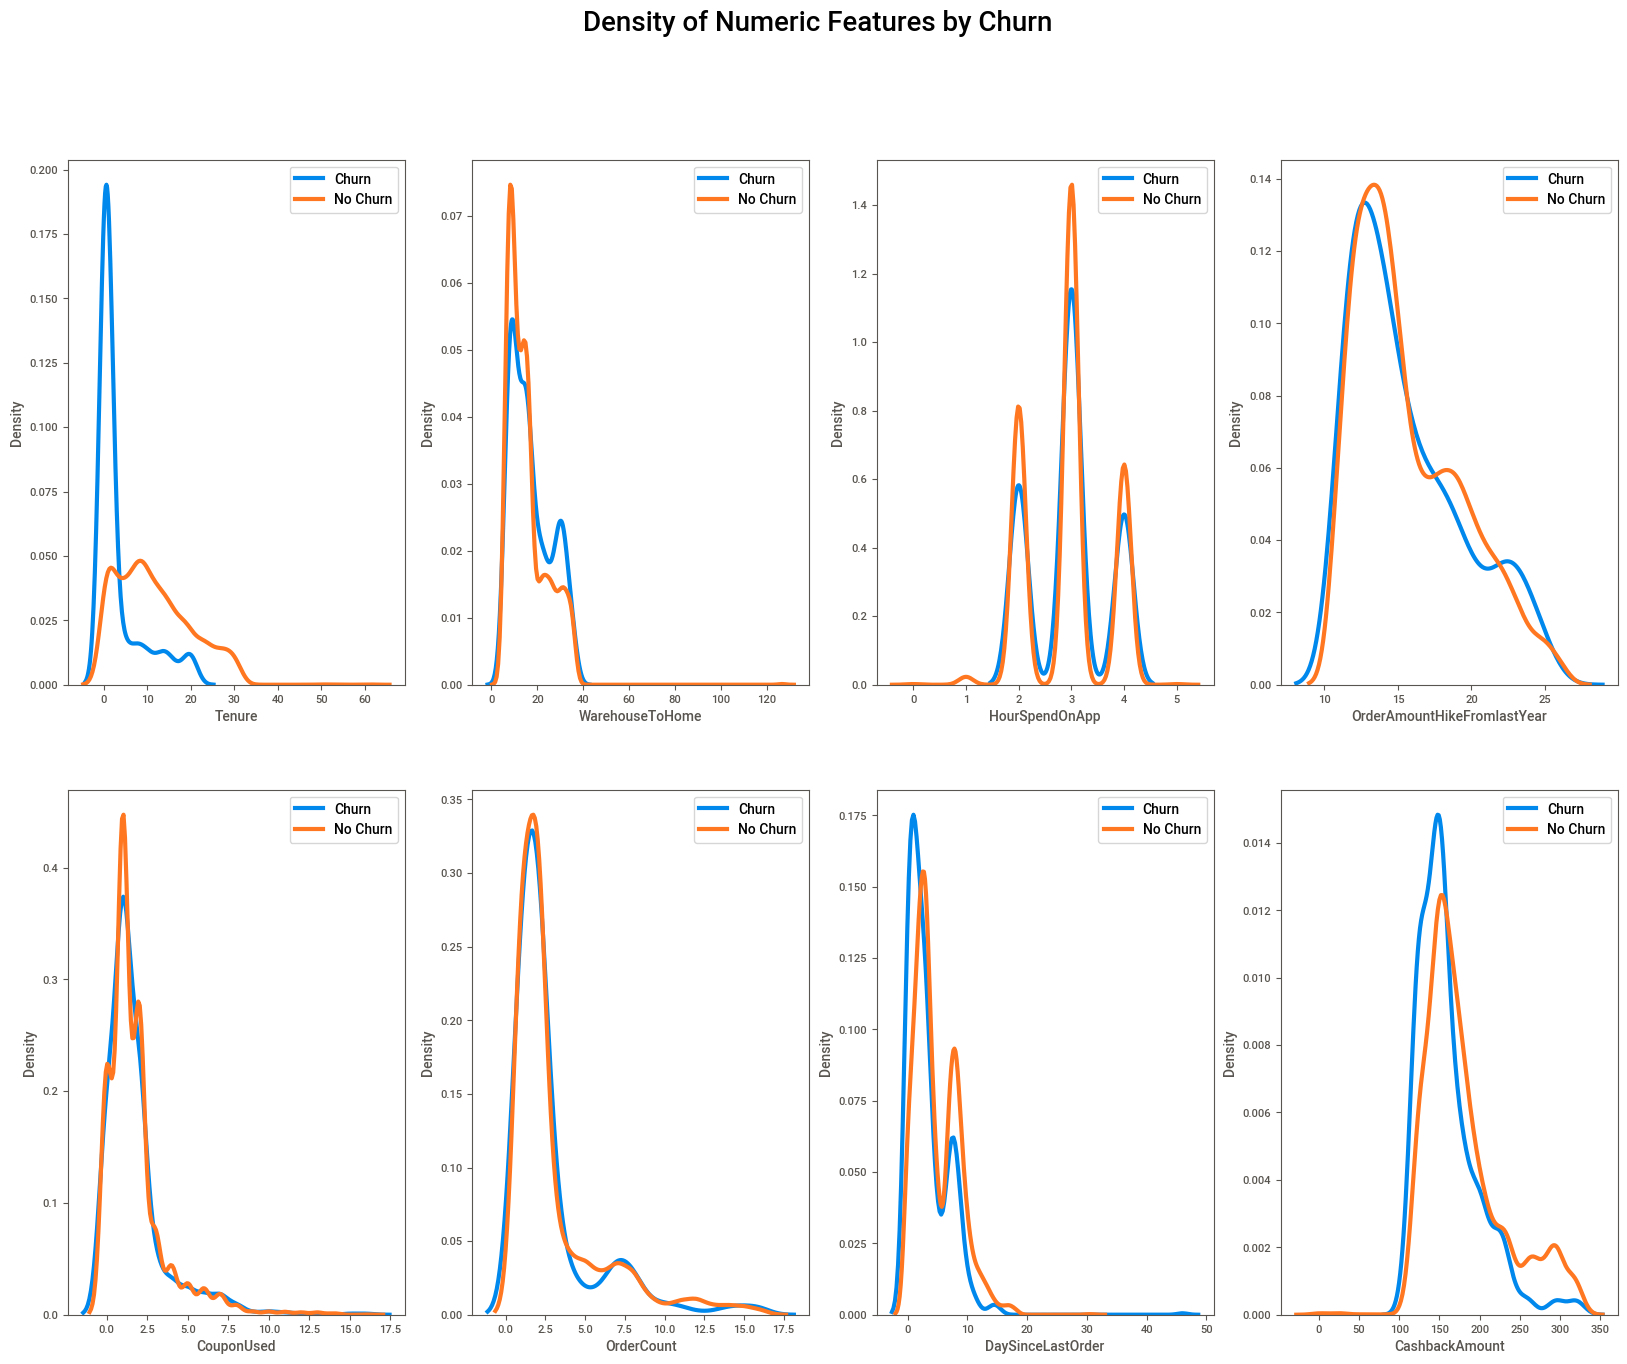

In [ ]:
df_c = df[df['Churn']==1].copy()
df_nc = df[df['Churn']==0].copy()

fig, ax = plt.subplots(2,4,figsize=(20, 15))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(num_cols):
    sns.kdeplot(df_c[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.kdeplot(df_nc[c], linewidth= 3,
             label = 'No Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()



**DISTRIBUTION INSIGHTS OF NUMERIC FEATURES**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

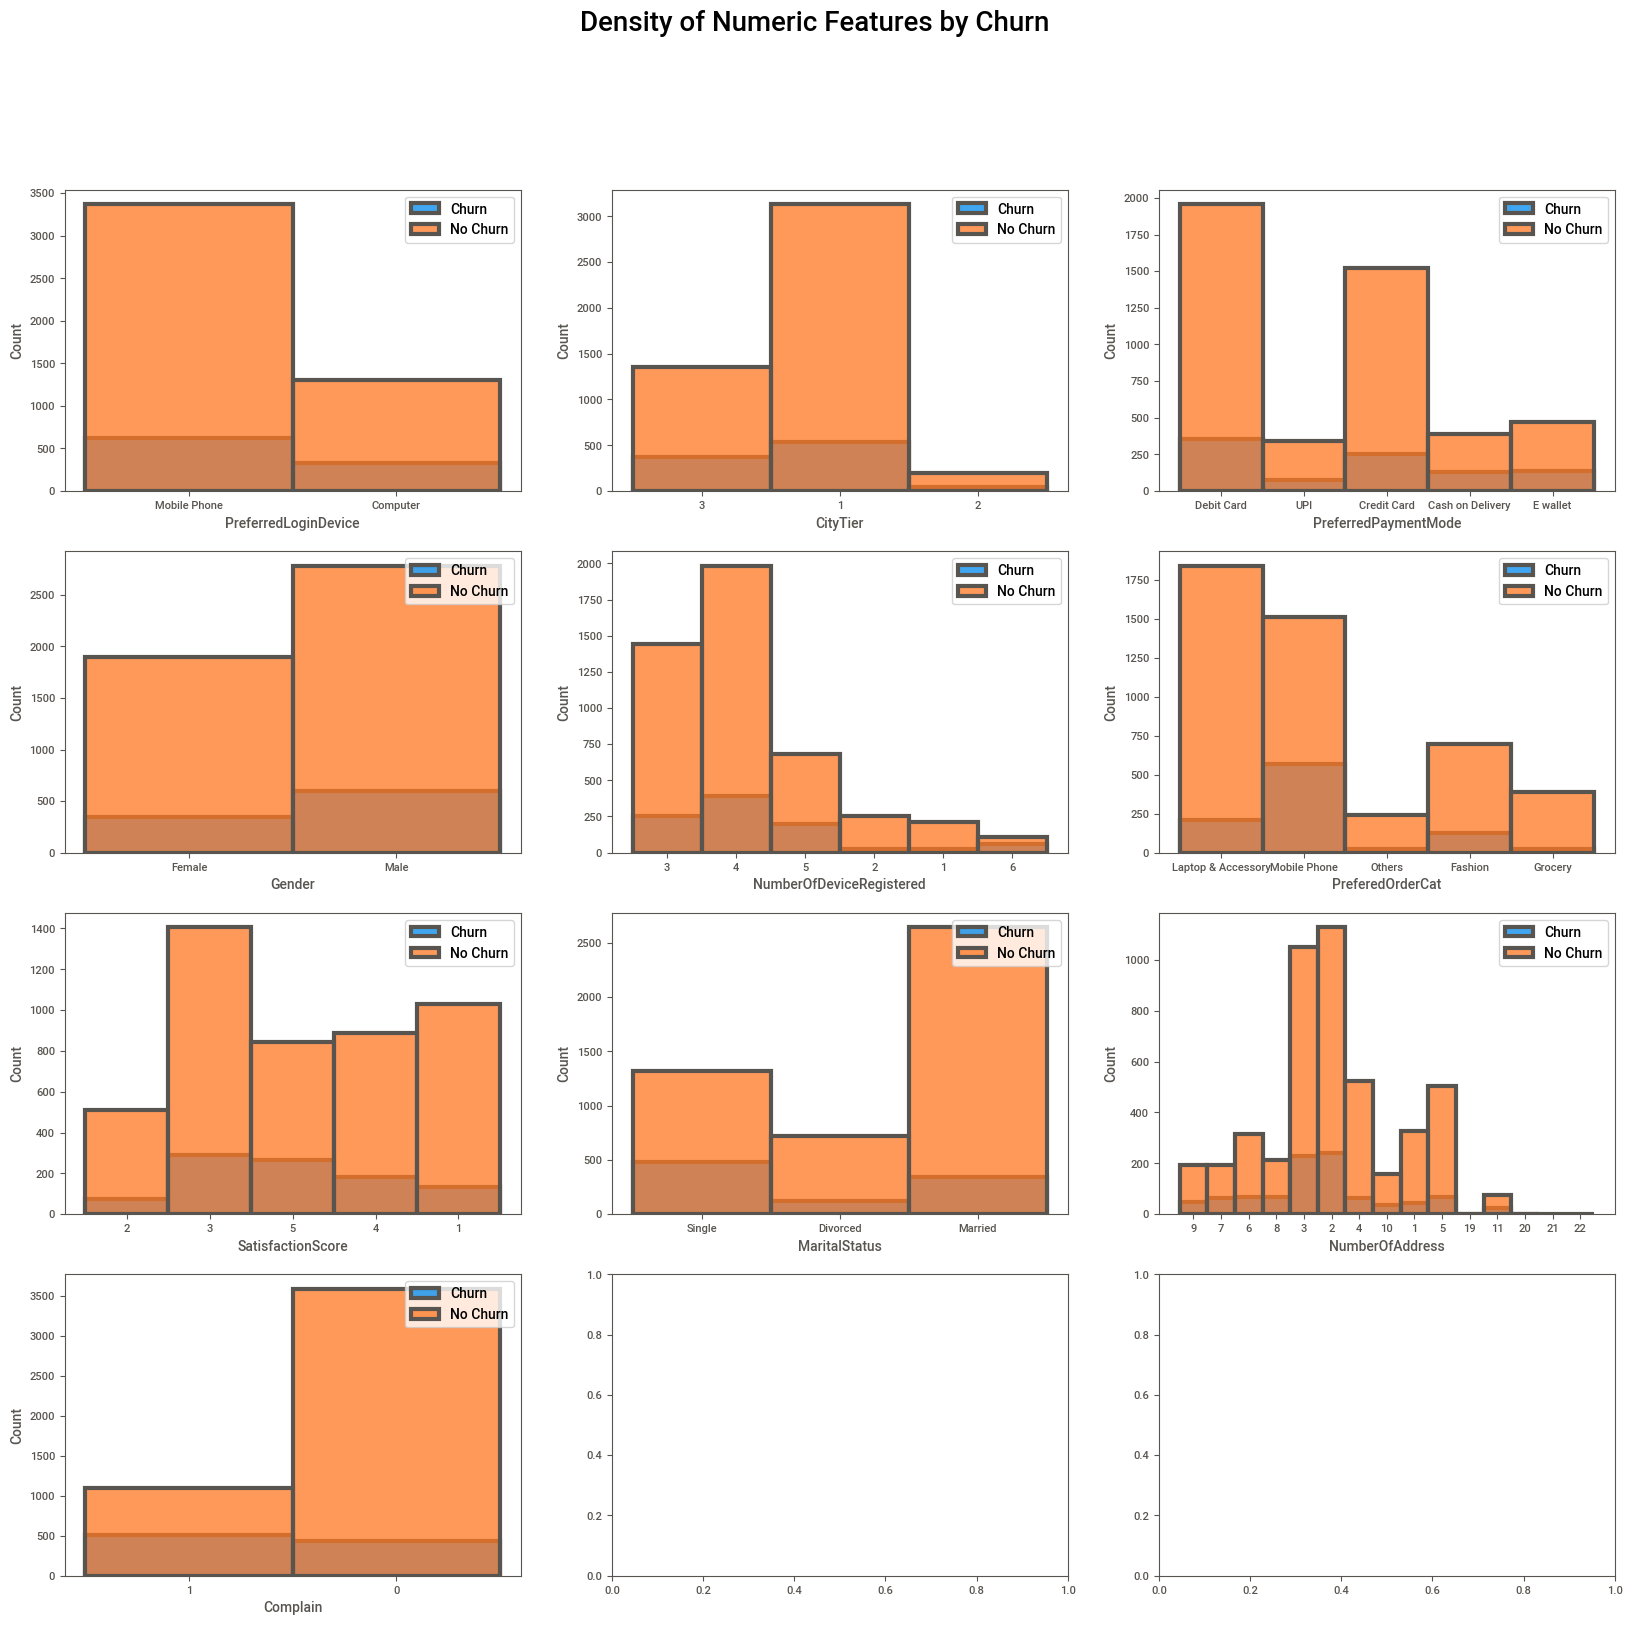

In [ ]:
df_c = df2[df2['Churn']=='1'].copy()
df_nc = df2[df2['Churn']=='0'].copy()

fig, ax = plt.subplots(4,3,figsize=(20, 18))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(cat_cols):
    sns.histplot(df_c[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.histplot(df_nc[c], linewidth= 3,
             label = 'No Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()

In [ ]:
# color palettes
pie_palette = ['#3E885B','#7694B6','#85BDA6', '#80AEBD', '#2F4B26', '#3A506B']
green_palette = ['#2F4B26', '#3E885B', '#85BDA6', '#BEDCFE', '#C0D7BB']
blue_palette = ['#3A506B', '#7694B6', '#80AEBD', '#5BC0BE', '#3E92CC']
custom_palette = ['#3A506B', '#7694B6', '#80AEBD', '#3E885B', '#85BDA6']
red_palette = ['#410B13', '#CD5D67', '#BA1F33', '#421820', '#91171F']

**1-Is there a relationship between Gender and Churn? & Which Gender has more Orders?**

In [ ]:
df['Gender'].value_counts()

Male      3384
Female    2246
Name: Gender, dtype: int64

In [ ]:
df.groupby("Churn")["Gender"].value_counts() # the churned females ratio 348/2246 * 100
                                              # the churned males ratio 600/3384 * 100

Churn  Gender
0      Male      2784
       Female    1898
1      Male       600
       Female     348
Name: Gender, dtype: int64

In [ ]:
df.groupby("PreferredLoginDevice")["OrderCount"].value_counts() # the churned females ratio 348/2246 * 100

PreferredLoginDevice  OrderCount
Computer              2.0            573
                      1.0            486
                      3.0            132
                      4.0             61
                      7.0             59
                      5.0             48
                      8.0             44
                      6.0             40
                      14.0            20
                      9.0             19
                      11.0            16
                      10.0            15
                      12.0            15
                      13.0             9
                      15.0             8
                      16.0             4
Mobile Phone          2.0           1108
                      1.0            576
                      3.0            176
                      4.0            119
                      7.0            115
                      8.0            113
                      5.0            107
                      6.

<Axes: xlabel='Gender'>

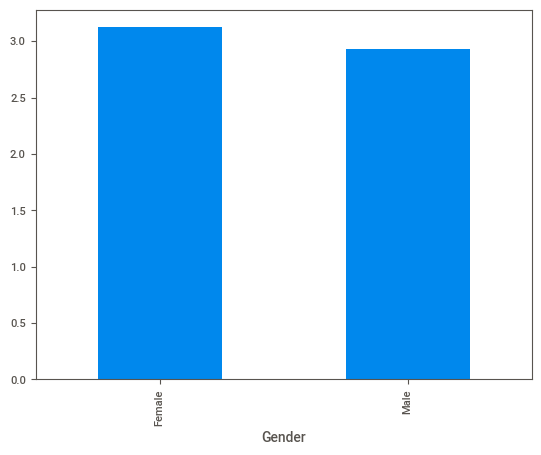

In [ ]:
gender_orders = df.groupby('Gender')['OrderCount'].mean().plot(kind='bar')

gender_orders  # females have more order count avg

There is no big difference between the males and females: avg order




In [ ]:
percentageM = 600/3384 * 100

percentageM   #the percentage of the leaving males out of the males


17.73049645390071

In [ ]:
percentageF =348/2246 * 100

percentageF  #the percentage of the leaving females out of the females


15.49421193232413

In [ ]:
import pandas as pd
import plotly.express as px

# Create figure
fig = px.pie(df, values='Churn', names='Gender')
fig.update_traces(marker=dict(colors=['pink ', 'baby blue']))

# Update layout
fig.update_layout(
  title='Churn Rate by Gender',
  legend_title='Gender'
)

# Show plot
fig.show()

# # Create figure
# fig = px.pie(df, values='OrderCount', names='Gender')
# fig.update_traces(marker=dict(colors=['pink ', 'baby blue']))

# # Update layout
# fig.update_layout(
#   title='order Rate by Gender',
#   legend_title='Gender'
# )

# # Show plot
# fig.show()


as we see the males are more likely to churn as we have 63.3 % churned males from the app may be the company should consider increasing the products that grap the males interest and so on.. we are going to see if there is another factors that makes the highest segment of churned customers are males.



**2-Which MartialStatus has the highest Churn rate?**

In [ ]:
df.groupby("Churn")["MaritalStatus"].value_counts()

Churn  MaritalStatus
0      Married          2642
       Single           1316
       Divorced          724
1      Single            480
       Married           344
       Divorced          124
Name: MaritalStatus, dtype: int64

Text(0, 0.5, 'Churn Rate')

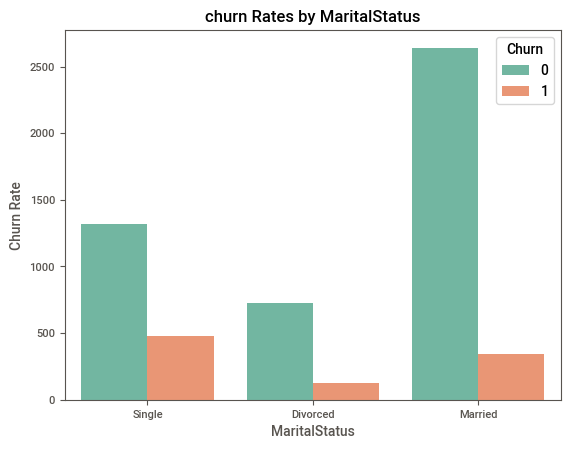

In [ ]:
sns.countplot(x='MaritalStatus',hue='Churn',data=df,palette='Set2')
plt.title("churn Rates by MaritalStatus")
plt.ylabel("Churn Rate")

-the married are the highest customer segment in the comapny may be the comapny should consider taking care of the products that suits the single and the married customers as the singles are the most likely to churn from the app

**3-Which CityTier has higher Tenure and OrderCount?¶


```
# This is formatted as code
```

**

In [ ]:
df_grouped_tenure = df.groupby('CityTier')['Tenure'].agg(['mean', 'max'])
df_grouped_tenure

,mean,max
CityTier,,
1,10.528818,51.0
2,11.169725,31.0
3,9.361740,61.0


In [ ]:
df_grouped_OrderCount = df.groupby('CityTier')['OrderCount'].agg(['mean', 'max'])
df_grouped_OrderCount

,mean,max
CityTier,,
1,2.953255,16.0
2,2.584034,13.0
3,3.185185,16.0


In [ ]:
#means = df_grouped['Tenure']['mean']
# means.plot(kind='pie',autopct='%1.1f%%')
# plt.xlabel('CityTier')
# plt.ylabel('Mean Tenure')

citytier 2 has the highest tenure rate but the tenure rate does not seen to be a strong factor

In [ ]:
df.groupby("CityTier")["OrderCount"].mean()

CityTier
1    2.953255
2    2.584034
3    3.185185
Name: OrderCount, dtype: float64

citytier 3 has the highest order avg but it not to be a strong factor in the customer churning

#4-Is Customer with High SatisfactionScore have high HourSpendOnApp?

Is there a correlation between SatisfactionScore and HourSpendOnApp?

In [ ]:
df['SatisfactionScore'].dtypes

dtype('int64')

In [ ]:
import matplotlib.pyplot as plt

# plot
fig = px.histogram(df2, x="HourSpendOnApp", y="SatisfactionScore", orientation="h", color="Churn" ,text_auto= True , title="<b>"+'HourSpendOnApp Vs SatisfactionScore' , color_discrete_sequence = ['#BA1F33','#3A506B','#3E885B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='HourSpendOnApp',
yaxis_title='SatisfactionScore',
)
fig.show()



# sns.barplot(x='SatisfactionScore',y='HourSpendOnApp',data=df)
# ax = df[['SatisfactionScore','HourSpendOnApp']].value_counts().plot(kind='bar')


as we see people with less satisfaction score spend less time on the app than the people of satisfaction score 5 but also i do not think there is any realation between the satisfaction score and people's spent time on the app



5-Which CityTier has the most HourSpendOnApp?


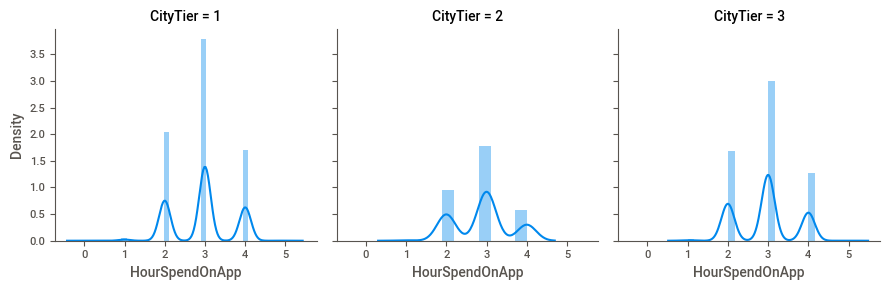

In [ ]:
g = sns.FacetGrid(df, col='CityTier')
g.map(sns.distplot, 'HourSpendOnApp')


city tier 1 has the most spended hours on the app



# 6-What is the relation between NumberOfAddress and CityTier within the churn segment?

In [ ]:
df.groupby("CityTier")["NumberOfAddress"].value_counts()

CityTier  NumberOfAddress
1         2                  871
          3                  832
          4                  397
          5                  377
          6                  247
          1                  228
          8                  187
          7                  173
          9                  150
          10                 129
          11                  71
          19                   1
          20                   1
          21                   1
          22                   1
2         2                   61
          3                   43
          5                   30
          1                   23
          6                   21
          4                   16
          10                  13
          7                   10
          8                   10
          11                   9
          9                    6
3         2                  437
          3                  403
          4                  175
          5      

<Axes: xlabel='CityTier', ylabel='NumberOfAddress'>

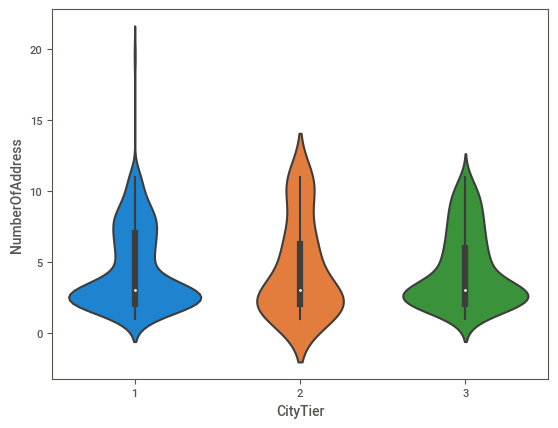

In [ ]:
# Violin plots
import seaborn as sns
sns.violinplot(x='CityTier', y='NumberOfAddress', data=df[df['Churn']==1])


There is a negative correlation between CityTier and NumberOfAddress. Higher CityTiers are associated with lower average NumberOfAddress and a more concentrated distribution. Customers in larger cities (CityTier 1) tend to have more addresses on average compared to smaller cities and towns in lower tiers. The relationship suggests address density and type of locality (metro vs smaller cities vs towns) impacts how many addresses customers have across city types.

# 7-What is the relation between Complain and DaySinceLastOrder?

In [ ]:
# Pearson correlation
df[['DaySinceLastOrder', 'Complain']].corr()

,DaySinceLastOrder,Complain
DaySinceLastOrder,1.000000,-0.043546
Complain,-0.043546,1.000000


In [ ]:
import plotly.express as px

fig = px.scatter(df, x='DaySinceLastOrder', y='Complain', facet_col='Churn')
fig.update_layout(hovermode='closest')
fig.show()

there is a weak negative relation between complainig and the number of days since last order


# **8-Is there a relationship between PreferredLoginDevice and churn?**

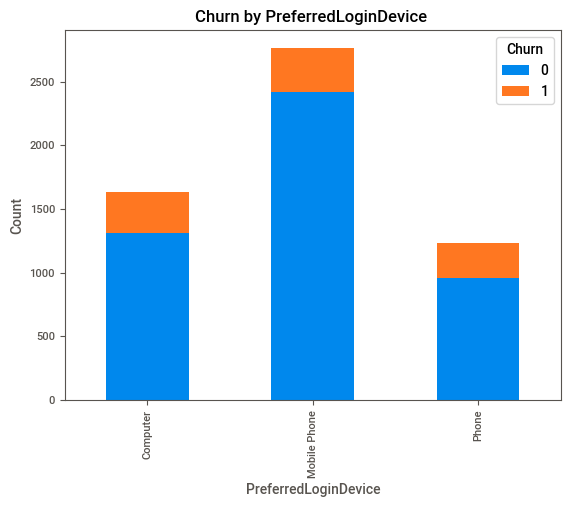

In [ ]:
# Bar chart with churn rate
import seaborn as sns
# sns.catplot(x='PreferredLoginDevice', y='Churn', data=df, kind='bar')

# Group the data by 'OverTime' and 'Attrition', and calculate the count
grouped_data = df.groupby(['PreferredLoginDevice', 'Churn']).size().unstack().plot(kind='bar', stacked=True)

# Set the plot title, x-label, and y-label
plt.title('Churn by PreferredLoginDevice ')
plt.xlabel('PreferredLoginDevice')
plt.ylabel('Count')

# Show the plot
plt.show()

mobile phone users are likely to churn may be this indicates a problem on the app user experience on the app mobile version

# **9-What is distancebetween warehosue to customer house in different city tier ?**

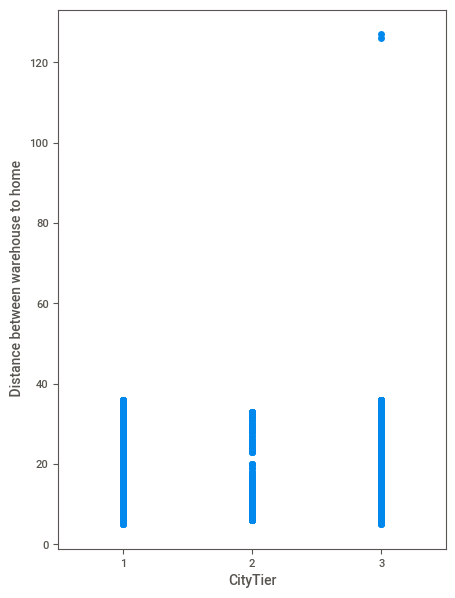

In [ ]:
df3 = df.copy()

df3['CityTier'].astype('str')
plt.figure(figsize = (5,7))
sns.stripplot(x = 'CityTier', y = 'WarehouseToHome', data = df3, jitter = False)
plt.ylabel(' Distance between warehouse to home');

**Inference:** As the distance from warehouse to home is similar in all city tier which means company had build warehouse in lower city tier also.

# **10-Does different citytiers has different prefered products?**

In [ ]:
import plotly.express as px
earth_palette = ["#A67C52", "#8F704D", "#B09B71", "#7E786E"]


fig=px.histogram(df,x="PreferedOrderCat",facet_col="CityTier",color="CityTier",color_discrete_sequence=earth_palette,text_auto= True , title="<b>"+'CityTier Vs PreferedOrderCat')

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferredPaymentMode',
yaxis_title='count',
)
fig.show()

laptop & accesories and mobile phones are the prefered category for all the city tiers



# **11- What is the preferred payment mode for different CityTiers?**

In [ ]:
df2['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

In [ ]:
df2.groupby('CityTier')[['PreferredPaymentMode']].value_counts()


CityTier  PreferredPaymentMode
1         Debit Card              1676
          Credit Card             1382
          Cash on Delivery         366
          UPI                      242
2         UPI                      114
          Debit Card                62
          Credit Card               50
          Cash on Delivery          16
3         E wallet                 614
          Debit Card               576
          Credit Card              342
          Cash on Delivery         132
          UPI                       58
dtype: int64

In [ ]:
import plotly.express as px

fig=px.histogram(df2,x="PreferredPaymentMode",facet_col="CityTier",color="CityTier",color_discrete_sequence=red_palette,text_auto= True , title="<b>"+'CityTier Vs PaymentMethod')

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferredPaymentMode',
yaxis_title='count',
)
fig.show()

*   preferred payment method for CityTier '1' ==> DebitCard

*   preferred payment method for CityTier '2' ==> UPI

*   preferred payment method for CityTier '3' ==> E wallet

# **12-Which CityTier has the highest OrderCount?**


In [ ]:
df2.groupby('CityTier')[['OrderCount']].sum()

,OrderCount
CityTier,
1,10298.0
2,615.0
3,5246.0


In [ ]:
fig = px.histogram(df2, x="OrderCount", y="CityTier", orientation="h", color="CityTier" ,text_auto= True , title="<b>"+'CityTier Vs Sum of OrderCount' , color_discrete_sequence = ['#BA1F33','#3A506B','#3E885B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Sum of OrderCount',
yaxis_title='count',
)
fig.show()

CityTier '1' has highest order count with 10298 orders

# **13-Does the percentage increase in order amount from last year affect churn rate?**

In [ ]:
df2['OrderAmountHikeFromlastYear'].value_counts()

14.0    750
13.0    741
12.0    728
15.0    542
11.0    391
16.0    333
18.0    321
19.0    311
17.0    297
20.0    243
21.0    190
22.0    184
23.0    144
24.0     84
25.0     73
26.0     33
Name: OrderAmountHikeFromlastYear, dtype: int64

In [ ]:
df2.groupby('OrderAmountHikeFromlastYear')['Churn'].count()

OrderAmountHikeFromlastYear
11.0    391
12.0    728
13.0    741
14.0    750
15.0    542
16.0    333
17.0    297
18.0    321
19.0    311
20.0    243
21.0    190
22.0    184
23.0    144
24.0     84
25.0     73
26.0     33
Name: Churn, dtype: int64

In [ ]:
comp_ten = df2.groupby(["OrderAmountHikeFromlastYear", "Churn"]).size().reset_index(name="Count")

# Create a bubble chart using Plotly
fig_bubble = px.scatter(comp_ten, x="OrderAmountHikeFromlastYear", y="Count", size="Count", color="Churn", title="<b>"+'OrderAmountHikeFromlastYear VS Churn',
                        color_discrete_sequence=["#d62728", "#1f77b4"])

# Customize the plot
fig_bubble.update_layout(hovermode='x',title_font_size=30)
fig_bubble.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='OrderAmountHikeFromlastYear',
yaxis_title='count',
)
fig_bubble.show()

Graph Show when the percentage of order last year increase the churn rate decrease so OrderAmountHikeFromlastYear has postive effect on Churn rate and we need to focus when customer has percentage 12% - 14%

# **14-What is the relation between Complain and DaySinceLastOrder for churned customers?**

In [ ]:
df_c.groupby('Complain')[['DaySinceLastOrder']].sum()

,DaySinceLastOrder
Complain,
0,1313.0
1,1580.0


In [ ]:
fig = px.histogram(df2, x="DaySinceLastOrder", color="Complain",text_auto= True , title="<b>DaySinceLastOrder Vs Complain" , color_discrete_sequence = ['#BA1F33','#3A506B'],
                   marginal="box") # or violin, rug)

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='DaySinceLastOrder',
yaxis_title='count',
)
fig.show()

customers who didn't made complain has higher DaySinceLastOrder , however it's only one customer so its an outlier if we remove it we will customers with no complain has lower DaySinceLastOrder

# **15-What is the order counts for customers with high HourSpendOnApp?**

In [ ]:
# we will make binnig for column HourSpendOnApp
df2['HourSpendOnApp'].agg(['min','max'])

min    0.0
max    5.0
Name: HourSpendOnApp, dtype: float64

In [ ]:
# Define the bin range
bins = [0 , 1 , 3 , 6]
label = ['low' , 'medium' , 'high']
# Create a new column 'HourSpendOnApp_bins' with the binned values
df2['HourSpendOnApp_bins'] = pd.cut(df2['HourSpendOnApp'], bins=bins , labels = label)

In [ ]:
df2.groupby(['HourSpendOnApp_bins','OrderCount'])[['CustomerID']].count()

CustomerID
HourSpendOnApp_bins OrderCount            
low                 1.0                 16
                    2.0                  7
                    3.0                  1
                    4.0                  3
                    5.0                  0
                    6.0                  0
                    7.0                  4
                    8.0                  0
                    9.0                  0
                    10.0                 0
                    11.0                 1
                    12.0                 1
                    13.0                 0
                    14.0                 0
                    15.0                 0
                    16.0                 0
medium              1.0               1553
                    2.0               1242
                    3.0                267
                    4.0                160
                    5.0                130
                    6.0                105
                    7.0                169
                    8.0                 99
                    9.0                 53
                    10.0                21
                    11.0                46
                    12.0                36
                    13.0                24
                    14.0                34
                    15.0                21
                    16.0                13
high                1.0                  1
                    2.0                738
                    3.0                 96
                    4.0                 34
                    5.0                 45
                    6.0                 30
                    7.0                 25
                    8.0                 69
                    9.0                  9
                    10.0                15
                    11.0                 4
                    12.0                15
                    13.0                 6
                    14.0                 2
                    15.0                10
                    16.0                10

In [ ]:
sunbrust_gr = df2.loc[:,['HourSpendOnApp_bins','OrderCount']].dropna()

In [ ]:
fig = px.sunburst(sunbrust_gr,path=['HourSpendOnApp_bins','OrderCount'],title="<b>"+'HourSpendOnApp VS OrderCount',template="plotly" , color_discrete_sequence=["#78b4d5", "#d57f86" ,'#3E885B'])
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
)
fig.update_traces(textinfo="label+percent parent")

fig.show()


Segment of customers has high spendtime on App has OrderCount 2 with percentage 67%

# **16-Is there a relationship between preferred order category and churn rate?**

In [ ]:
df2.groupby(['PreferedOrderCat' , 'Gender'])[['CustomerID']].count()


CustomerID
PreferedOrderCat   Gender            
Fashion            Female         354
                   Male           472
Grocery            Female         198
                   Male           212
Laptop & Accessory Female         844
                   Male          1206
Mobile Phone       Female         764
                   Male          1316
Others             Female          86
                   Male           178

In [ ]:
import plotly.express as px

# Assuming 'pie_palette' is defined somewhere
fig = px.histogram(ordercat_churnrate,
                   x='PreferedOrderCat',
                   y='Count',  # Using 'Count' instead of 'count'
                   color='Gender',
                   barmode='group',
                   color_discrete_sequence=pie_palette,
                   title="<b>Prefered Category Vs Gender",
                   barnorm="percent",
                   text_auto=True)

fig.update_layout(
    hovermode='x',
    title_font_size=30,
    title_font_color="black",
    template="plotly",
    hoverlabel_font_size=20,
    title_x=0.5,
    xaxis_title='PreferedOrderCat',
    yaxis_title='Count'
)

fig.show()




*   Top 2 Preferd Category For Males == > [ Others , Mobile Phone ]
*   Top 2 Preferd Category For Females == > [ Grocery , Fashion ]



# **17-Do customers who used more coupons have lower churn rates?**

In [ ]:
df2.groupby(['CouponUsed' , 'Churn'])[['CustomerID']].count()

CustomerID
CouponUsed Churn            
0.0        0             844
           1             186
1.0        0            1727
           1             378
2.0        0            1061
           1             222
3.0        0             281
           1              46
4.0        0             167
           1              30
5.0        0             106
           1              23
6.0        0              90
           1              18
7.0        0              71
           1              18
8.0        0              33
           1               9
9.0        0              11
           1               2
10.0       0              11
           1               3
11.0       0              10
           1               2
12.0       0               8
           1               1
13.0       0               8
14.0       0               5
15.0       1               1
16.0       0               1
           1               1

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming df2 is your DataFrame and it contains columns 'CouponUsed' and 'Churn'
coupoun_churnrate = pd.DataFrame(df2.groupby('CouponUsed')['Churn'].value_counts())
coupoun_churnrate = coupoun_churnrate.rename(columns={'Churn': 'Count'})
coupoun_churnrate = coupoun_churnrate.reset_index()

# Plot
fig = px.bar(coupoun_churnrate,
             x='CouponUsed',
             y='Count',  # Using 'Count' instead of 'count'
             color='Churn',
             barmode='group',
             color_discrete_sequence=['rgba(58, 71, 80, 0.6)', 'rgba(246, 78, 139, 1.0)'],
             title="<b>CouponUsed Vs Churn Rate",
             text_auto=True)

fig.update_layout(
    hovermode='x',
    title_font_size=30,
    title_font_color="black",
    template="plotly",
    hoverlabel_font_size=20,
    title_x=0.5,
    xaxis_title='CouponUsed',
    yaxis_title='Count'
)

fig.show()



Grpah shows Churn become less when more coupons used

# **18-Is there a connection between satisfaction score and number of orders in the past month?**

In [ ]:
df2.groupby('SatisfactionScore')[['OrderCount']].count()


,OrderCount
SatisfactionScore,
1,1120
2,558
3,1618
4,1020
5,1056


In [ ]:
fig = px.box(df2, y="OrderCount", x='SatisfactionScore', color="SatisfactionScore", title="<b>"+'SatisfactionScore Vs OrderCount',
             boxmode="overlay", points='all')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='SatisfactionScore',
yaxis_title='OrderCount',
)
fig.show()

StatisfactionScore doesn't have affect on OrderCount

# **19-There is the relation between CashbackAmount and order counts within churn?**

In [ ]:
df_c.groupby(['OrderCount','CashbackAmount'])[['Churn']].count()

Churn
OrderCount CashbackAmount       
1.0        110.09              2
           110.81              2
           110.91              2
           111.02              2
           111.18              2
...                          ...
15.0       203.12              2
           295.45              2
16.0       152.43              2
           228.12              2
           320.45              2

[461 rows x 1 columns]

In [ ]:
# fig = px.density_contour(df2, x="HourSpendOnApp", y="OrderCount", color = 'churn',
#                          title="<b>"+'HourSpendOnApp Vs OrderCount within churn',
#                           color_discrete_sequence=["#d62728", "#1f77b4"]
#                         )
fig = px.histogram(df2, x='CashbackAmount', y='OrderCount' ,color = 'Churn', title="<b>"+'CashbackAmount Vs OrderCount within churn', color_discrete_sequence=["#d62728", "#1f77b4"])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='CashbackAmount',
yaxis_title='OrderCount',
)
fig.show()

Graphs shows there is no relation between cash back amount and ordercount and there is a postive relation between cashback amount and churn rate

# **20-Are customers who complained more likely to churn?**

In [ ]:
df2.groupby('Complain')[['Churn']].count()

,Churn
Complain,
0,4026
1,1604


In [ ]:
import plotly.express as px

# Renaming the 'Churn' column to 'Count' and resetting index
comp_churn = pd.DataFrame(df2.groupby('Complain')['Churn'].value_counts())
comp_churn = comp_churn.rename(columns={'Churn': 'Count'})
comp_churn = comp_churn.reset_index()

# Replacing numerical labels with categorical labels
comp_churn['Complain'].replace('0', 'No Complain', inplace=True)
comp_churn['Complain'].replace('1', 'Complain', inplace=True)
comp_churn['Churn'].replace('0', 'No Churn', inplace=True)
comp_churn['Churn'].replace('1', 'Churn', inplace=True)

# Tree map
fig = px.treemap(comp_churn,
                 path=['Complain', 'Churn'],  # Changed 'px.Constant("all")' to 'Complain'
                 values='Count',  # Using 'Count' instead of 'count'
                 color_discrete_sequence=["#2F4B26", '#FF0000'],
                 title="<b>Complain Vs Churn")
fig.update_traces(textinfo="label+percent parent+value", root_color="lightgrey")
fig.update_layout(margin=dict(t=70, l=25, r=25, b=25))

# Customize the plot
fig.update_layout(hovermode='x', title_font_size=30)
fig.update_layout(
    title_font_color="black",
    template="plotly",
    title_font_size=30,
    hoverlabel_font_size=20,
    title_x=0.5,
)

fig.show()


No complain doesn't affects on Churn as graph shows customers which made complains 68% doesn't make Churn

# **Data Processing**

# Handling Missing Values

In [ ]:
round((df.isnull().sum()*100 / df.shape[0]),2)

CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

<Axes: >

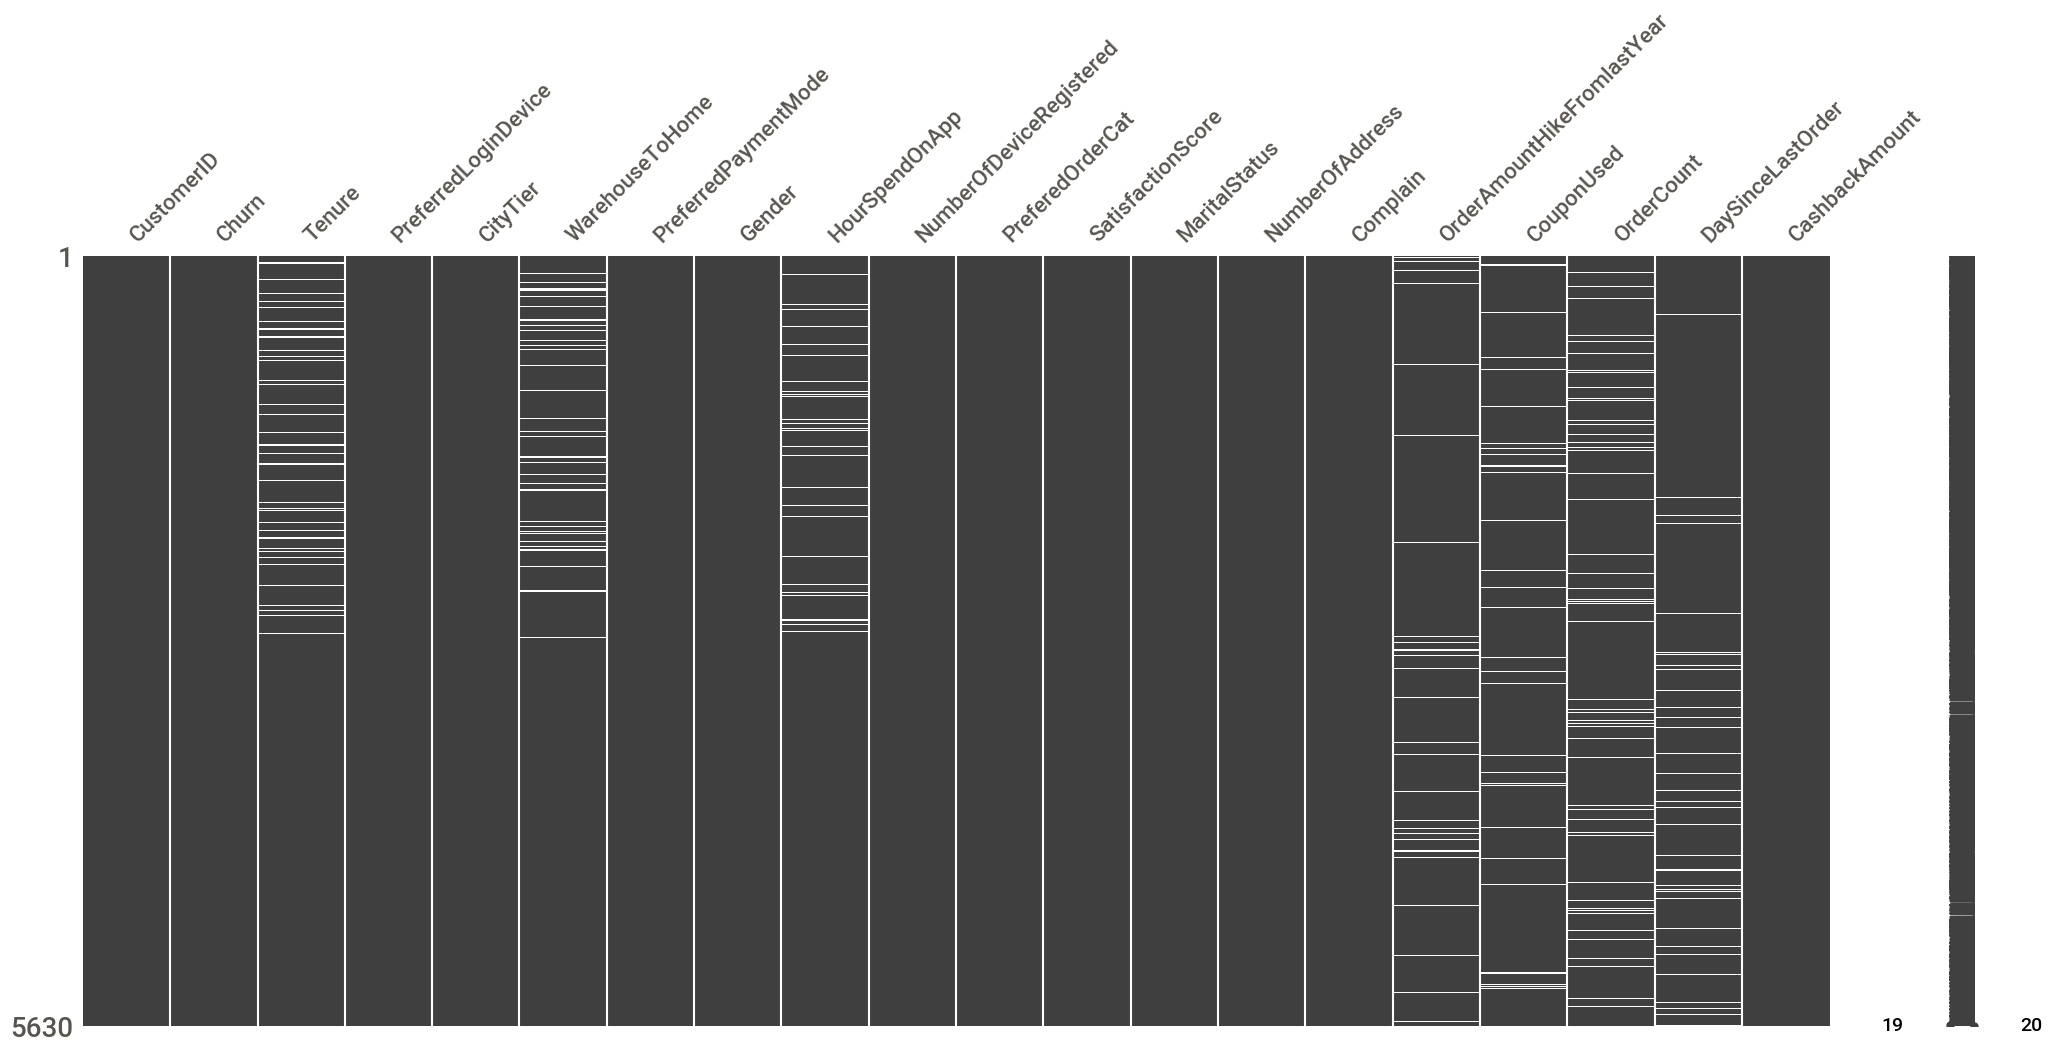

In [ ]:
msno.matrix(df)

<Axes: >

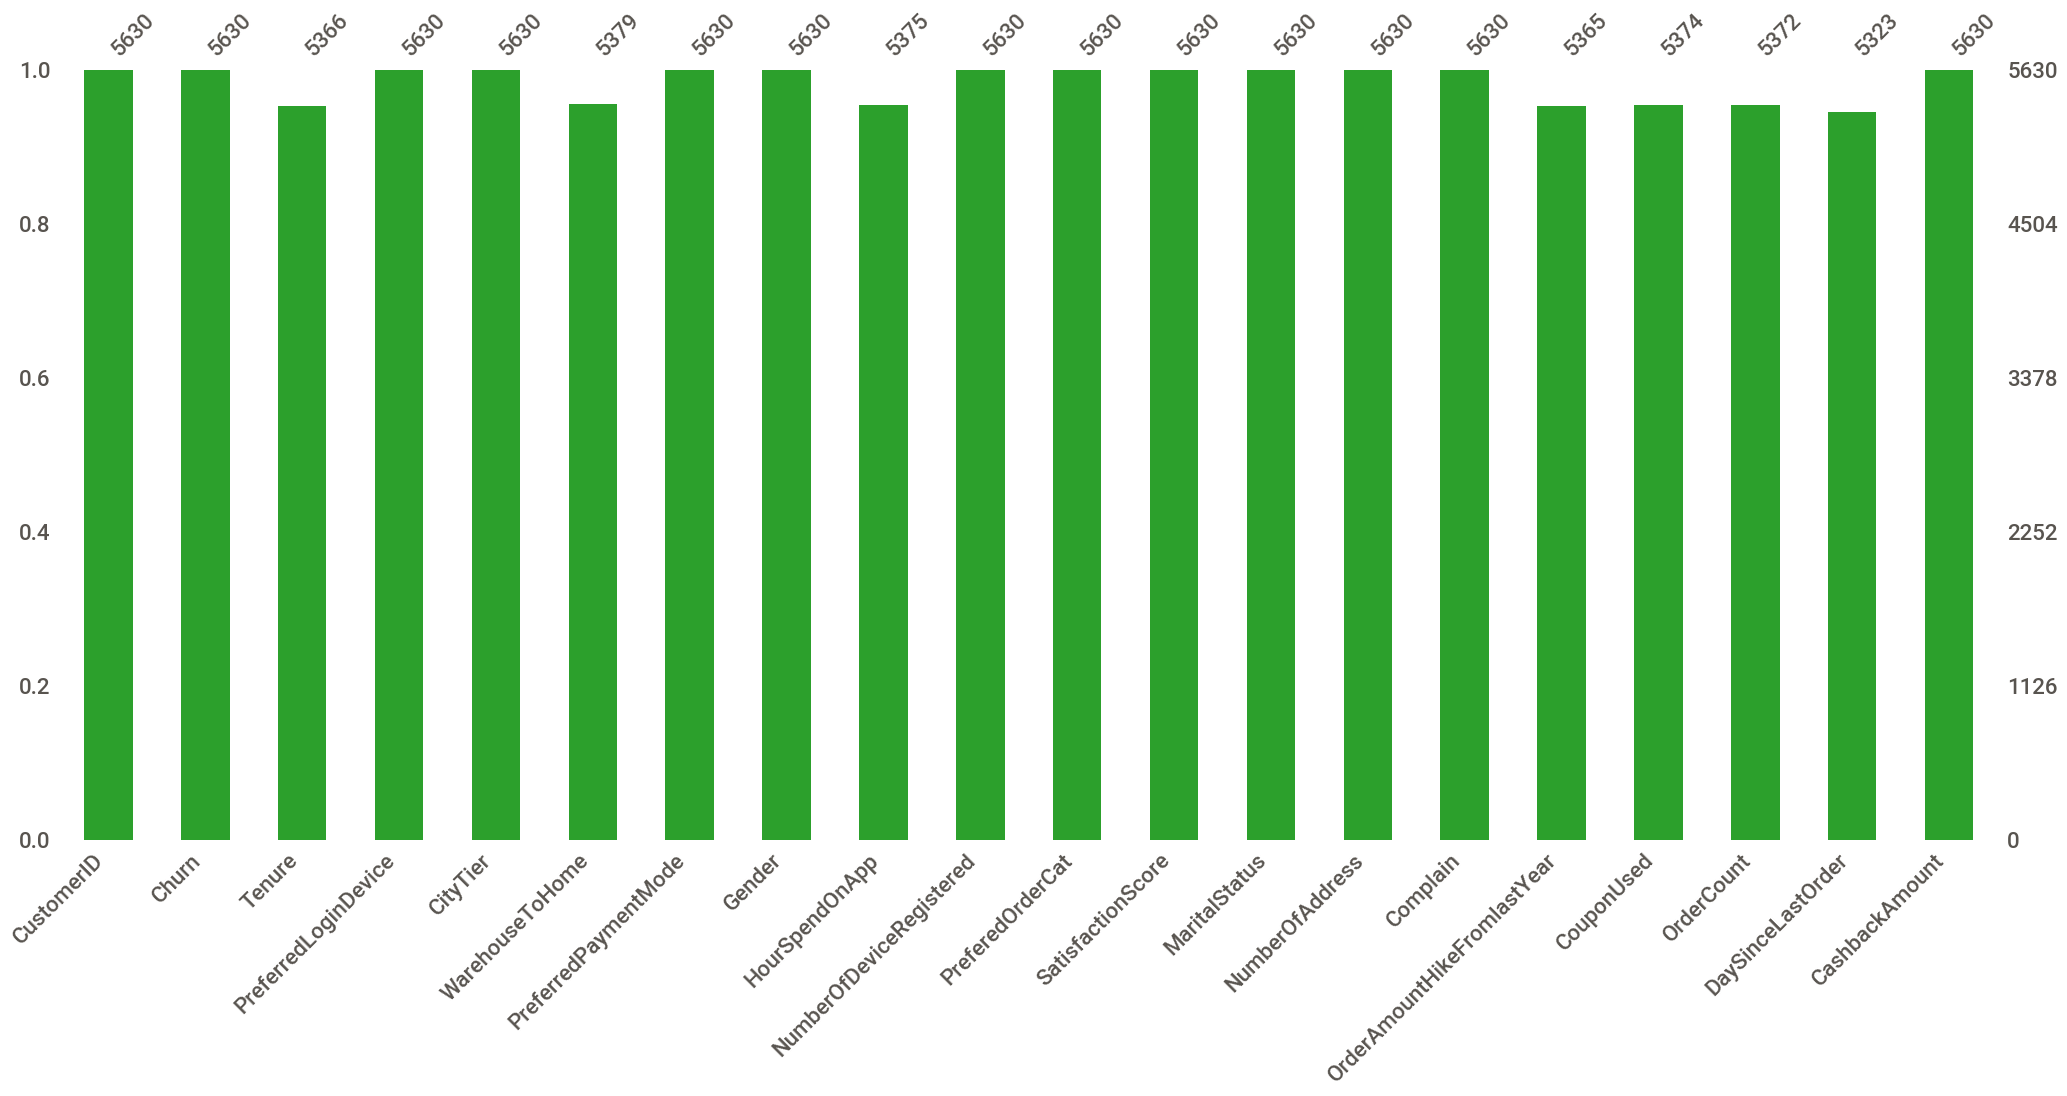

In [ ]:
msno.bar(df , color="tab:green")

All Missing values less than 6% so we can impute them



<Axes: xlabel='Tenure', ylabel='Density'>

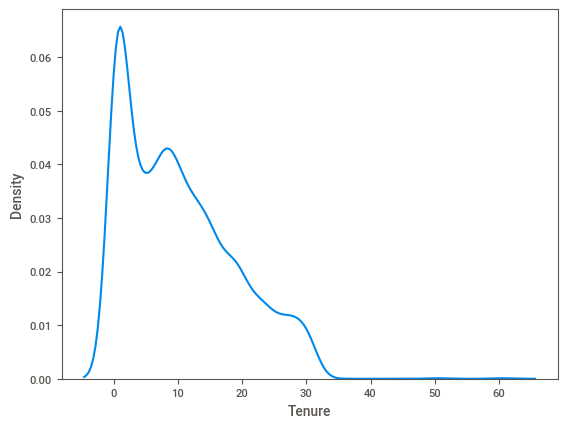

In [ ]:
sns.kdeplot(df , x='Tenure')

In [ ]:
# impute with bfill Method
df['Tenure'] = df['Tenure'].fillna(method = 'bfill')

<Axes: xlabel='Tenure', ylabel='Density'>

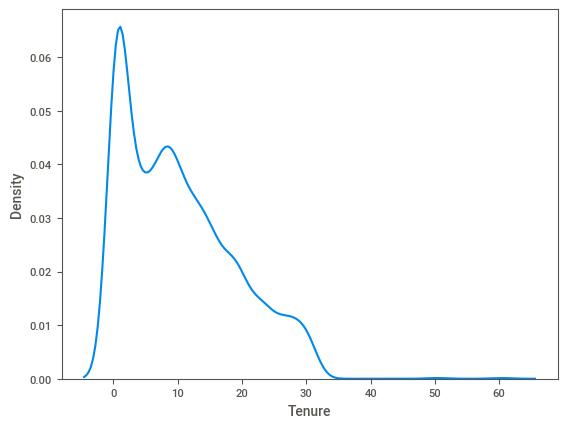

In [ ]:
sns.kdeplot(df , x='Tenure')

In [ ]:
df['Tenure'].isnull().sum()

0

<Axes: xlabel='WarehouseToHome', ylabel='Density'>

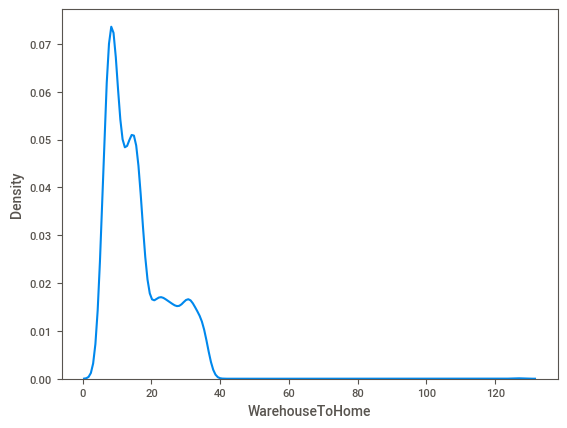

In [ ]:
sns.kdeplot(df , x='WarehouseToHome')

In [ ]:
# Impute with simple imputer
from sklearn.impute import SimpleImputer
s_imp = SimpleImputer(missing_values=np.nan , strategy = 'most_frequent')
df['WarehouseToHome'] = s_imp.fit_transform(pd.DataFrame(df['WarehouseToHome']))

<Axes: xlabel='WarehouseToHome', ylabel='Density'>

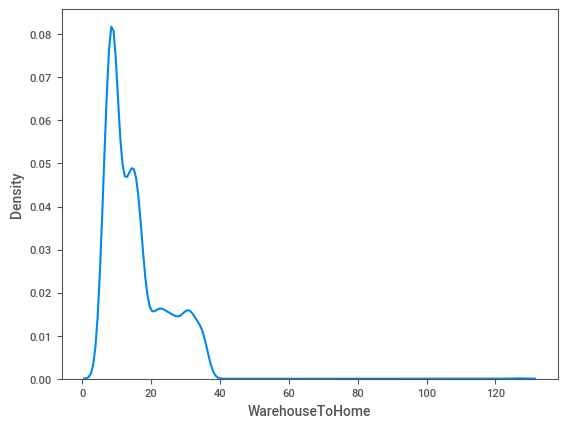

In [ ]:
sns.kdeplot(df , x='WarehouseToHome')

In [ ]:
df['WarehouseToHome'].isnull().sum()


0

<Axes: xlabel='HourSpendOnApp', ylabel='Density'>

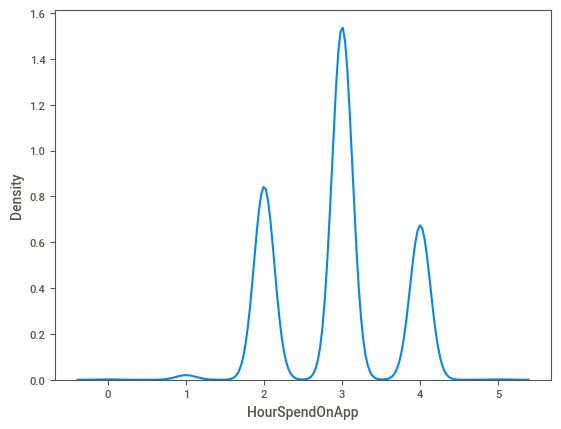

In [ ]:
sns.kdeplot(df , x='HourSpendOnApp')


In [ ]:
fill_list = df['HourSpendOnApp'].dropna()
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(pd.Series(np.random.choice(fill_list , size = len(df['HourSpendOnApp'].index))))

<Axes: xlabel='HourSpendOnApp', ylabel='Density'>

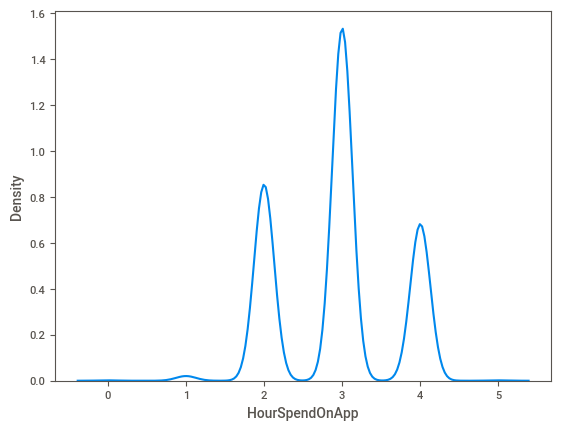

In [ ]:
sns.kdeplot(df , x='HourSpendOnApp')

In [ ]:
df['HourSpendOnApp'].isnull().sum()


0

<Axes: xlabel='OrderAmountHikeFromlastYear', ylabel='Density'>

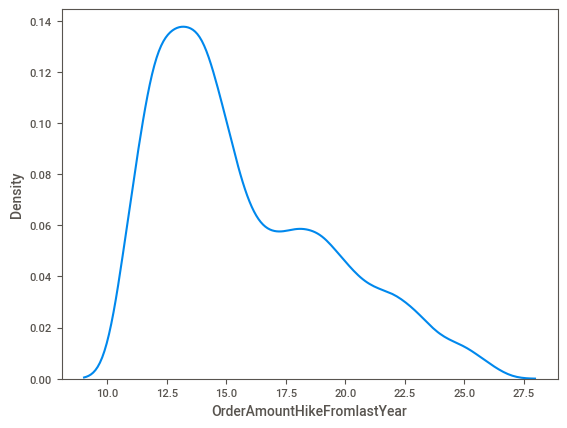

In [ ]:
sns.kdeplot(df , x='OrderAmountHikeFromlastYear')


In [ ]:
# impute with ffill method
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(method = 'ffill')

<Axes: xlabel='OrderAmountHikeFromlastYear', ylabel='Density'>

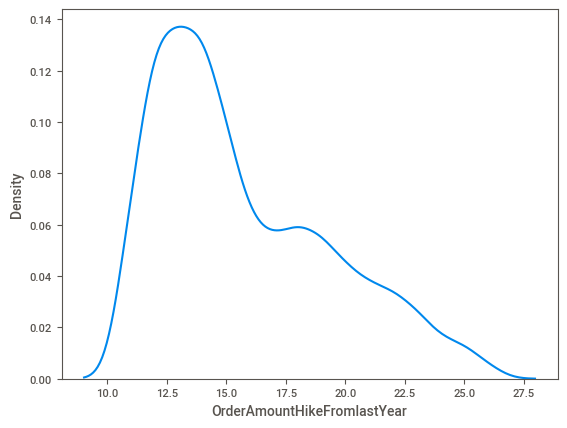

In [ ]:
sns.kdeplot(df , x='OrderAmountHikeFromlastYear')

In [ ]:
df['OrderAmountHikeFromlastYear'].isnull().sum()

0

<Axes: xlabel='CouponUsed', ylabel='Density'>

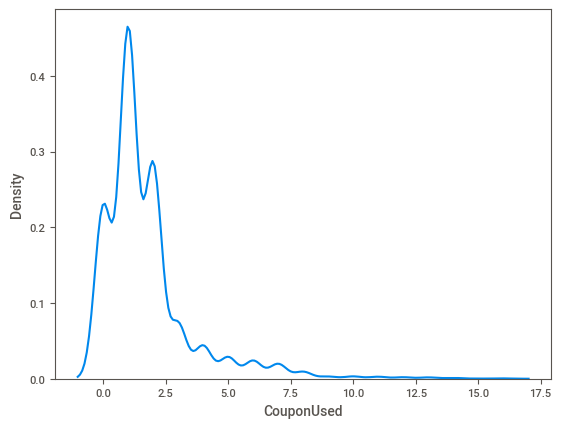

In [ ]:
sns.kdeplot(df , x='CouponUsed')

In [ ]:
# Impute with KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df['CouponUsed']=imputer.fit_transform(df[['CouponUsed']])

<Axes: xlabel='CouponUsed', ylabel='Density'>

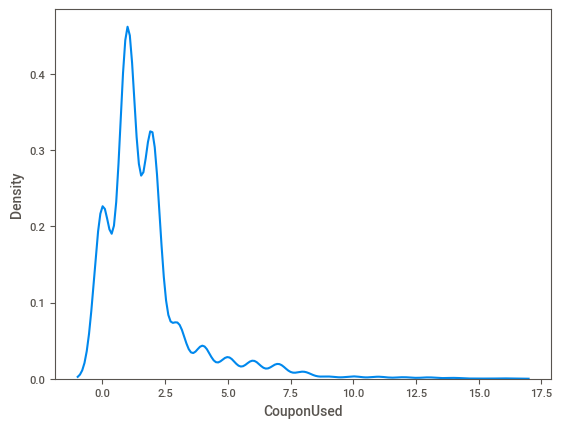

In [ ]:
sns.kdeplot(df , x='CouponUsed')

In [ ]:
df['CouponUsed'].isnull().sum()

0

<Axes: xlabel='OrderCount', ylabel='Density'>

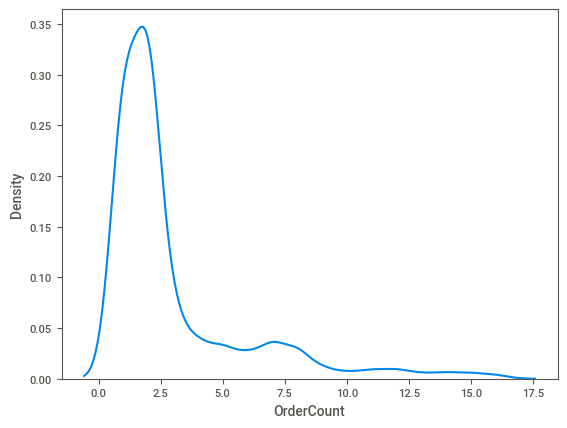

In [ ]:
sns.kdeplot(df , x='OrderCount')

In [ ]:
# Impute with KNN imputer
imputer_2 = KNNImputer(n_neighbors=2)
df['OrderCount']=imputer_2.fit_transform(df[['OrderCount']])

<Axes: xlabel='OrderCount', ylabel='Density'>

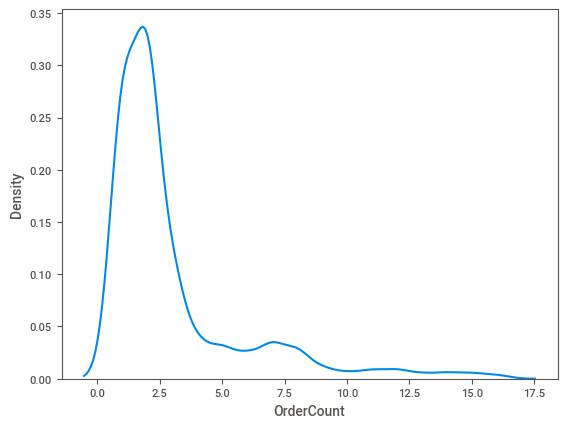

In [ ]:
sns.kdeplot(df , x='OrderCount')

In [ ]:
df['OrderCount'].isnull().sum()

0

<Axes: xlabel='DaySinceLastOrder', ylabel='Density'>

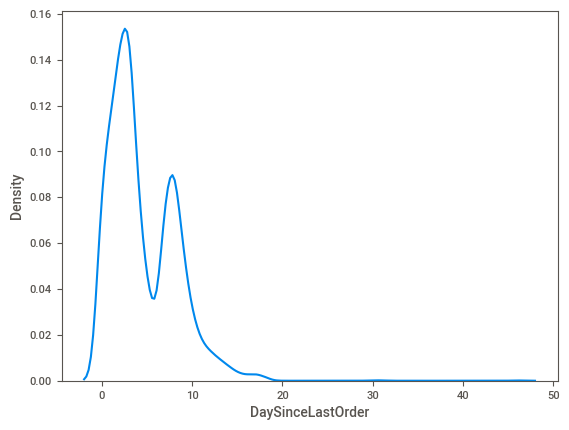

In [ ]:
sns.kdeplot(df , x='DaySinceLastOrder')

In [ ]:
# impute with bfill Method
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(method = 'bfill')

<Axes: xlabel='DaySinceLastOrder', ylabel='Density'>

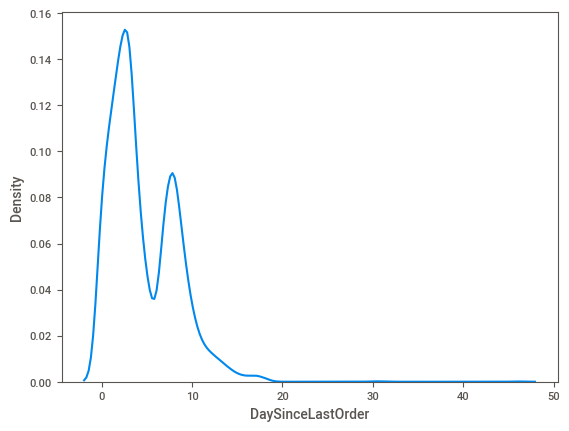

In [ ]:
sns.kdeplot(df , x='DaySinceLastOrder')

In [ ]:
df['DaySinceLastOrder'].isnull().sum()

0

In [ ]:
# After we Checked the data the Customer ID Column not important for our Models so We drop it
df.drop('CustomerID' , axis = 1 , inplace = True)

In [ ]:
df.shape

(5630, 19)

We Handled Mssing Values

# **Encoding**

In [ ]:
# check before encoding that my catogries for my columns are limited
for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts())
        print('*' * 40)

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
****************************************
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
****************************************
Male      3384
Female    2246
Name: Gender, dtype: int64
****************************************
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64
****************************************
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64
****************************************


In [ ]:
# cat columns
data = df[df.select_dtypes(exclude=np.number).columns]
data

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,CC,Male,Mobile,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Mobile Phone,Credit Card,Male,Fashion,Married
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


In [ ]:
le = LabelEncoder()

In [ ]:
# Encode for cat_cols
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df.head(4)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,0.0,2,1,8.0,6,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,1,0.0,2,1,30.0,4,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,2,3,15.0,4,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07


In [ ]:
for i in data.columns:
    data[i] = le.fit_transform(data[i])

data.head(4)

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,1,4,0,2,2
1,2,6,1,3,2
2,2,4,1,3,2
3,2,4,1,2,2


# **Handling Outliers**

In [ ]:
df.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice             int64
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode             int64
Gender                           int64
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                 int64
SatisfactionScore                int64
MaritalStatus                    int64
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

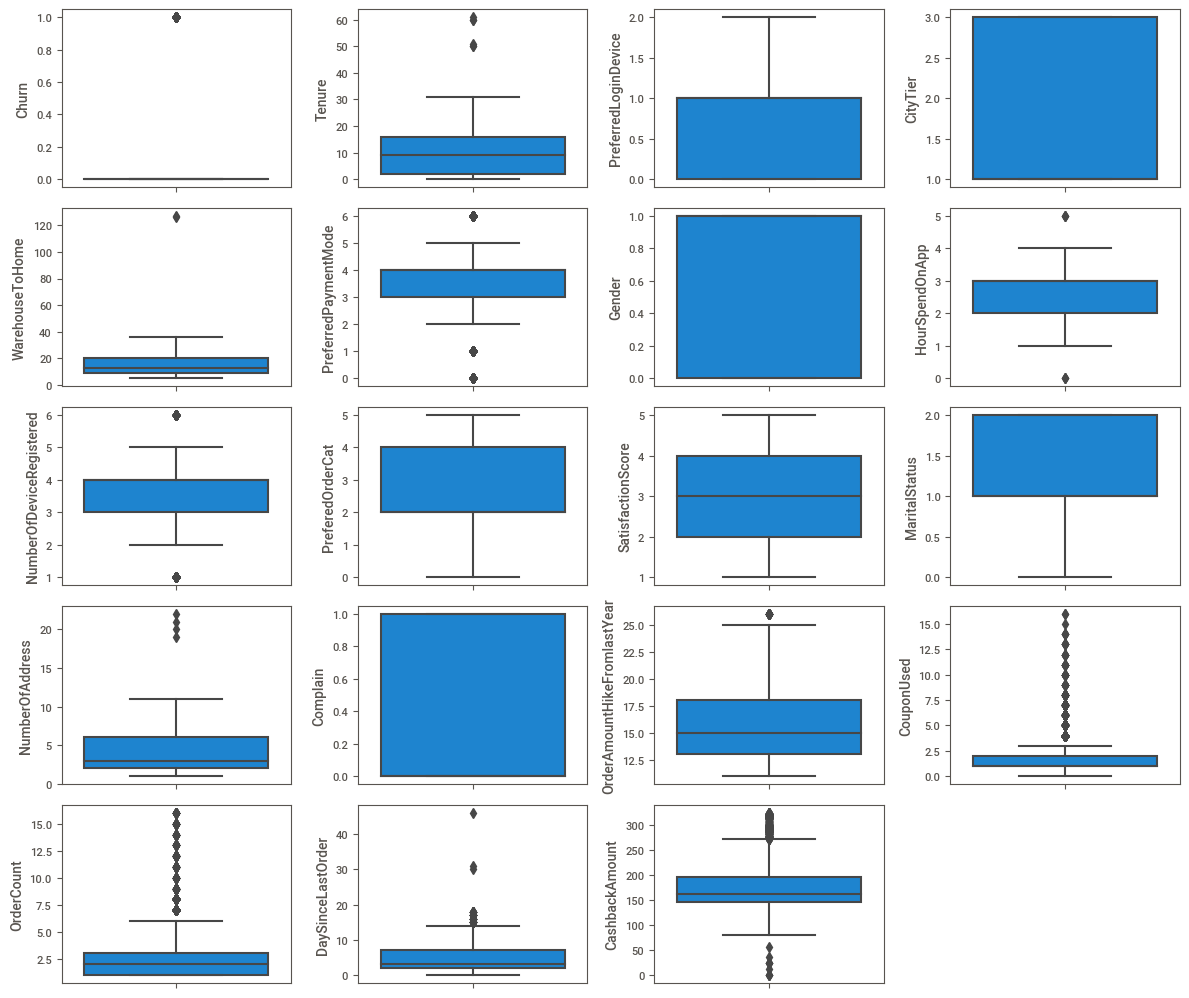

In [ ]:
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [ ]:
# lets detect True Outliers
def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  # Define Upper and lower boundaries
  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  # lets make filter for col values
  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

In [ ]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
# lets Give our Functions columns contains outlier
cols_outliers = ['Tenure' , 'WarehouseToHome' , 'NumberOfAddress' , 'DaySinceLastOrder' , 'HourSpendOnApp' , 'NumberOfDeviceRegistered']

for col in cols_outliers:
    df = handle_outliers(df , col)

df.head(4)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,0.0,2,1,8.0,6,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,1,0.0,2,1,30.0,4,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,2,3,15.0,4,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07


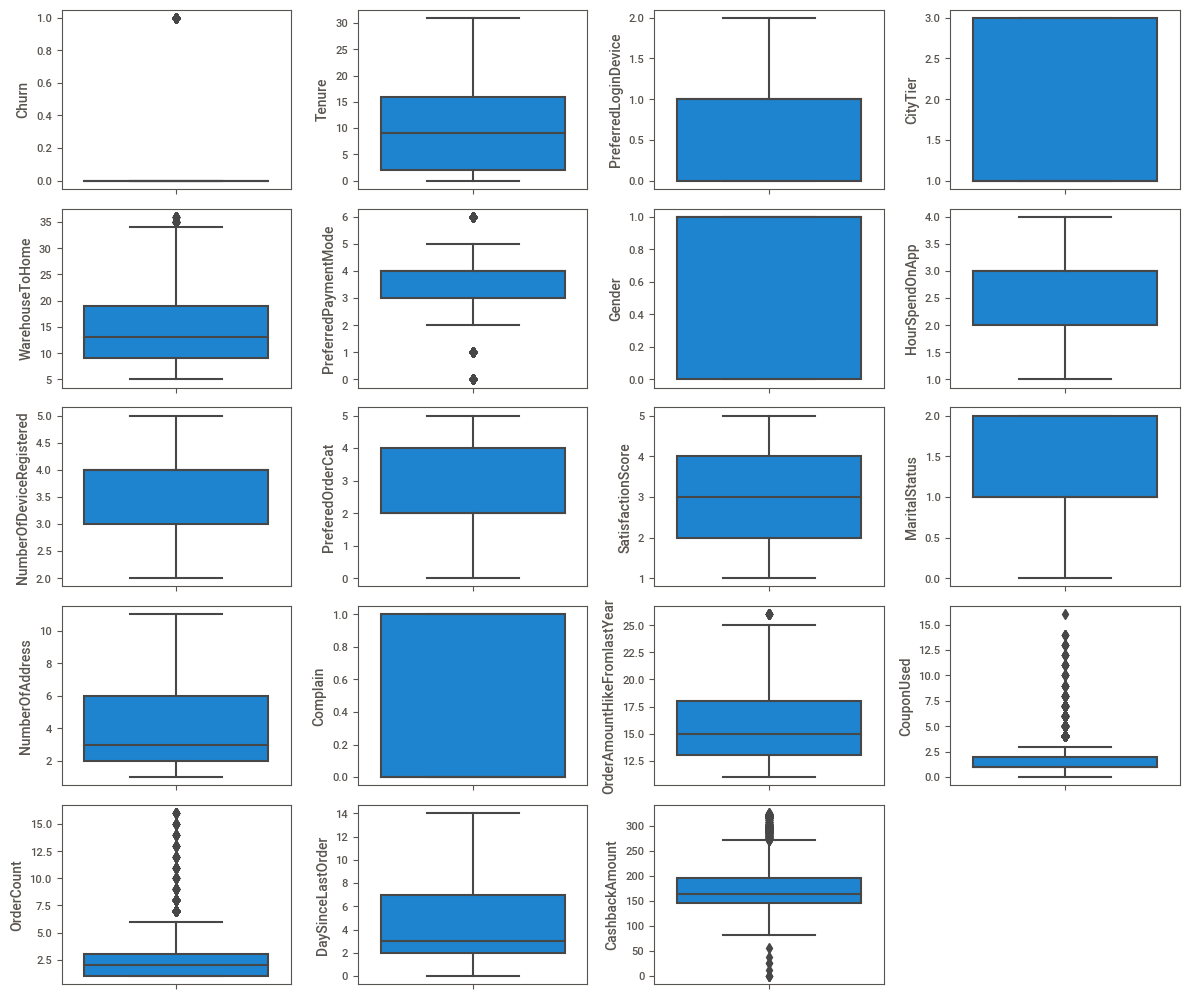

In [ ]:
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

we made Trim on cols that contains outliers but after we check we saw many inforamtion deleted so we made Trimming only on cols that not conatins many outliers

In [ ]:
corr_matrix = df.corr()
corr_matrix

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,-0.336058,0.027574,0.069595,0.054768,-0.037398,0.038193,-0.006294,0.079116,0.115604,0.108600,0.131982,0.033703,0.252346,-0.002545,-0.017914,-0.036568,-0.164448,-0.165008
Tenure,-0.336058,1.000000,-0.081204,-0.065933,-0.011849,0.041412,-0.054684,-0.005133,-0.019592,-0.169986,-0.013331,-0.111074,0.240939,-0.023903,0.017177,0.127314,0.181138,0.164444,0.453981
PreferredLoginDevice,0.027574,-0.081204,1.000000,-0.063092,-0.052052,-0.072458,0.010152,-0.079811,-0.082608,0.163990,0.052788,0.003466,-0.052607,0.007016,-0.013655,-0.109824,-0.122282,-0.146917,-0.232013
CityTier,0.069595,-0.065933,-0.063092,1.000000,0.014636,0.238241,-0.022759,-0.009159,0.007282,-0.190314,-0.009735,0.002254,-0.033363,0.006312,-0.022135,0.017139,0.035656,0.023394,0.044946
WarehouseToHome,0.054768,-0.011849,-0.052052,0.014636,1.000000,0.038004,-0.015904,0.079533,0.029049,-0.104242,0.013783,-0.028226,0.001173,0.022052,0.028927,0.013175,0.016235,0.044883,0.036318
PreferredPaymentMode,-0.037398,0.041412,-0.072458,0.238241,0.038004,1.000000,0.001378,0.040889,0.061301,-0.091362,-0.019142,-0.028367,0.040292,0.023704,0.021512,0.049944,0.024606,0.054237,0.157898
Gender,0.038193,-0.054684,0.010152,-0.022759,-0.015904,0.001378,1.000000,-0.012743,-0.020954,0.066026,-0.037348,-0.019975,-0.030577,-0.030350,-0.007694,-0.026477,-0.031097,-0.027594,-0.024311
HourSpendOnApp,-0.006294,-0.005133,-0.079811,-0.009159,0.079533,0.040889,-0.012743,1.000000,0.268523,0.084651,0.034275,-0.042477,0.137529,-0.009750,0.105079,0.182539,0.106302,0.087675,0.118558
NumberOfDeviceRegistered,0.079116,-0.019592,-0.082608,0.007282,0.029049,0.061301,-0.020954,0.268523,1.000000,0.037465,-0.001042,0.037437,0.071084,-0.002056,0.061287,0.135974,0.092487,0.026054,0.120031
PreferedOrderCat,0.115604,-0.169986,0.163990,-0.190314,-0.104242,-0.091362,0.066026,0.084651,0.037465,1.000000,-0.000421,0.042353,-0.077699,0.001371,0.019334,-0.113058,-0.145184,-0.220091,-0.274145


<Axes: >

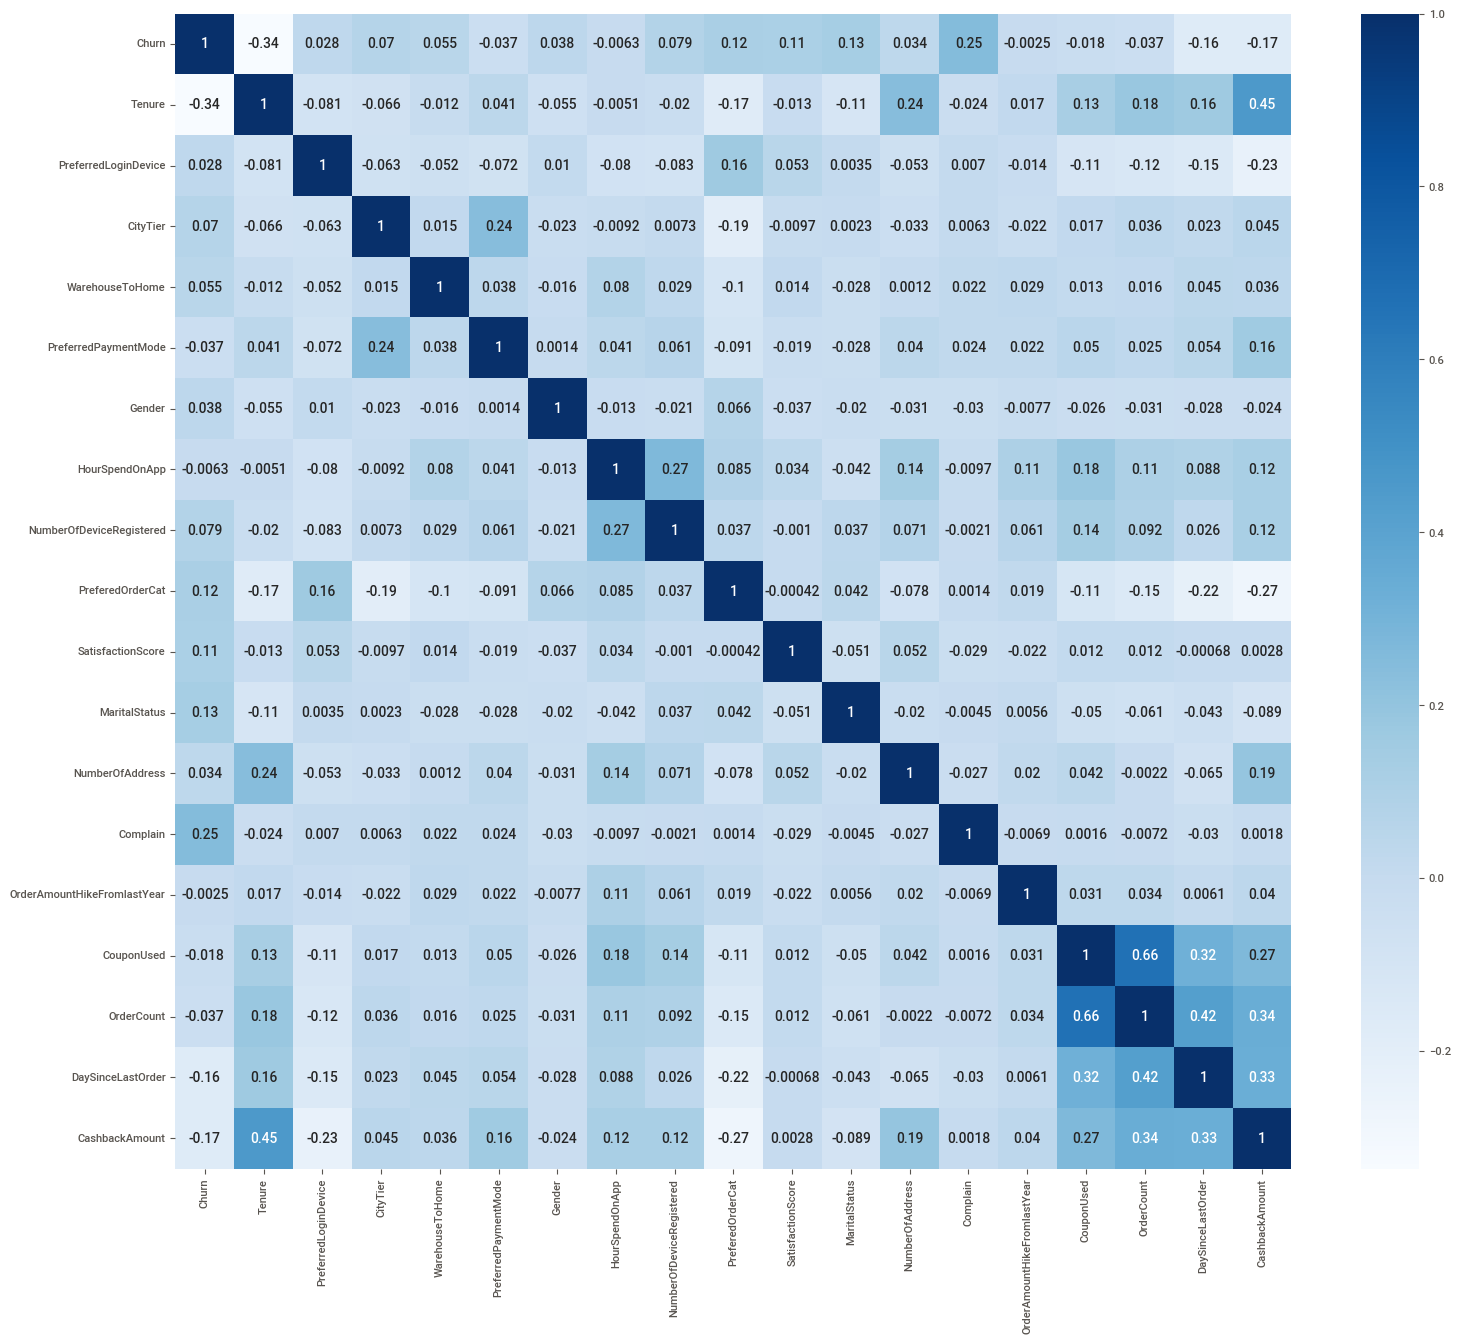

In [ ]:
plt.figure(figsize = (18,15))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

In [ ]:
churn_corr_vector = corr_matrix['Churn'].sort_values(ascending = False)
churn_corr_vector

Churn                          1.000000
Complain                       0.252346
MaritalStatus                  0.131982
PreferedOrderCat               0.115604
SatisfactionScore              0.108600
NumberOfDeviceRegistered       0.079116
CityTier                       0.069595
WarehouseToHome                0.054768
Gender                         0.038193
NumberOfAddress                0.033703
PreferredLoginDevice           0.027574
OrderAmountHikeFromlastYear   -0.002545
HourSpendOnApp                -0.006294
CouponUsed                    -0.017914
OrderCount                    -0.036568
PreferredPaymentMode          -0.037398
DaySinceLastOrder             -0.164448
CashbackAmount                -0.165008
Tenure                        -0.336058
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Relation Between Features and target')

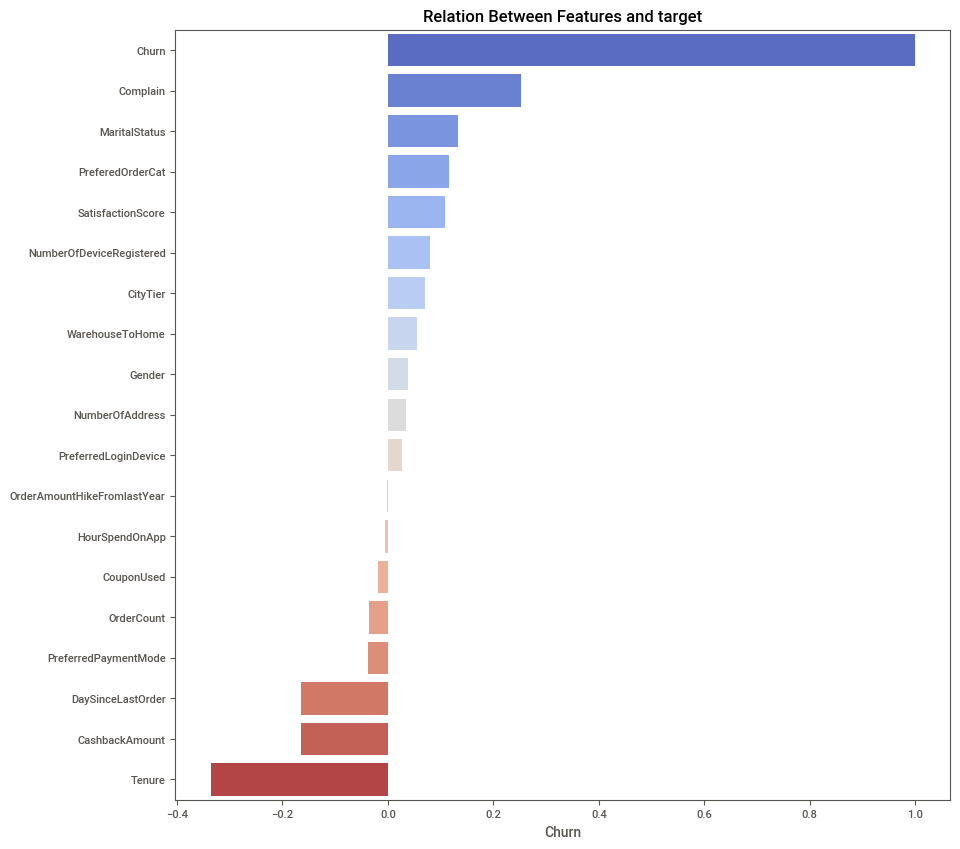

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(x = churn_corr_vector , y = churn_corr_vector.index , palette = 'coolwarm')
plt.title('Relation Between Features and target')

In [ ]:
fig = px.histogram(df2, x="Churn", color="Churn" ,text_auto= True , title="<b>"+'Check Imbalance' , color_discrete_sequence = ['#BA1F33','#3A506B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Churn',
yaxis_title='count',
)
fig.show()

Our Data Imbalanced so lets make Over sample for it Using SMOTETomek

# **Handling Imbalanced Data**

In [ ]:
X = df.drop('Churn' , axis = 1)
Y = df['Churn']

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
smt = SMOTETomek(random_state=42)
x_over , y_over = smt.fit_resample(X , Y)

In [ ]:
x_over.shape, y_over.shape

((8584, 18), (8584,))

# **Split Data**

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x_over , y_over , test_size = 0.30 , random_state = 42)

In [ ]:
# Now we  will make normalization for all data to make them in commom range
from sklearn.preprocessing import MinMaxScaler , StandardScaler , RobustScaler

MN = MinMaxScaler()
# SC = StandardScaler()
# Rb = RobustScaler()
x_train_scaled = MN.fit_transform(x_train)
x_test_scaled = MN.fit_transform(x_test)

# **Modelling**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings

warnings.filterwarnings("ignore")

In [ ]:
logisreg_clf = LogisticRegression()
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
XGB_clf = XGBClassifier()
ada_clf = AdaBoostClassifier()

In [ ]:
clf_list = [logisreg_clf, svm_clf, dt_clf, rf_clf, XGB_clf, ada_clf]
clf_name_list = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'XGBClassifier' , 'AdaBoostClassifier']

for clf in clf_list:
    clf.fit(x_train_scaled,y_train)

In [ ]:
train_acc_list = []
test_acc_list = []

for clf,name in zip(clf_list,clf_name_list):
    y_pred_train = clf.predict(x_train_scaled)
    y_pred_test = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Trainning Score: {clf.score(x_train_scaled, y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)

Using model: Logistic Regression
Trainning Score: 0.7648135818908123
Test Score: 0.765527950310559
Acc Train: 0.7648135818908123
Acc Test: 0.765527950310559
                                                            
************************************************************
                                                            
Using model: Support Vector Machine
Trainning Score: 0.9032956058588548
Test Score: 0.8815993788819876
Acc Train: 0.9032956058588548
Acc Test: 0.8815993788819876
                                                            
************************************************************
                                                            
Using model: Decision Tree
Trainning Score: 1.0
Test Score: 0.9355590062111802
Acc Train: 1.0
Acc Test: 0.9355590062111802
                                                            
************************************************************
                                                            
Using mod

In [ ]:
# graph to determine best 2 models

all_models = pd.DataFrame({'Train_Accuarcy': train_acc_list , 'Test_Accuarcy' : test_acc_list}  , index = clf_name_list)
all_models

,Train_Accuarcy,Test_Accuarcy
Logistic Regression,0.764814,0.765528
Support Vector Machine,0.903296,0.881599
Decision Tree,1.000000,0.935559
Random Forest,1.000000,0.973991
XGBClassifier,1.000000,0.968556
AdaBoostClassifier,0.875999,0.864519


In [ ]:
# Models vs Train Accuracies
fig = px.bar(all_models, x=all_models['Train_Accuarcy'], y = all_models.index ,color=all_models['Train_Accuarcy'],title="<b>"+'Models Vs Train Accuracies',text_auto= True , color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Train Sccracy',
yaxis_title='Models Names',
)
fig.show()

# Models vs Test Accuracies
fig = px.bar(all_models, x=all_models['Test_Accuarcy'], y = all_models.index ,color=all_models['Test_Accuarcy'],title="<b>"+'Models Vs Test Accuracies',text_auto= True , color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Test Accuarcy',
yaxis_title='Models Names',
)
fig.show()

from Graphs Best 2 Models in Train and Test are [ Random Forest , XGBoost]

In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, RocCurveDisplay

# **Evaluation**

Accuracy = 0.765527950310559
ROC Area under Curve = 0.7655900755904372
              precision    recall  f1-score   support

           0    0.78921   0.72558   0.75606      1290
           1    0.74532   0.80560   0.77429      1286

    accuracy                        0.76553      2576
   macro avg    0.76727   0.76559   0.76517      2576
weighted avg    0.76730   0.76553   0.76516      2576

**********************************************************************


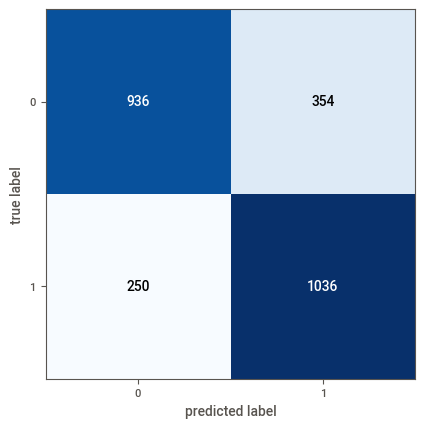

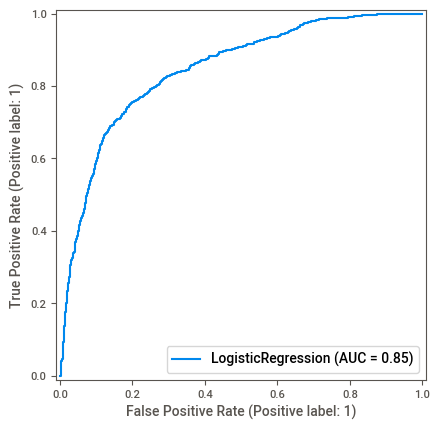

In [ ]:
# Logistic regression
model= LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc1 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc1))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
print('*' * 70)
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.8815993788819876
ROC Area under Curve = 0.8816394806322109
              precision    recall  f1-score   support

           0    0.90270   0.85581   0.87863      1290
           1    0.86253   0.90747   0.88443      1286

    accuracy                        0.88160      2576
   macro avg    0.88261   0.88164   0.88153      2576
weighted avg    0.88264   0.88160   0.88152      2576



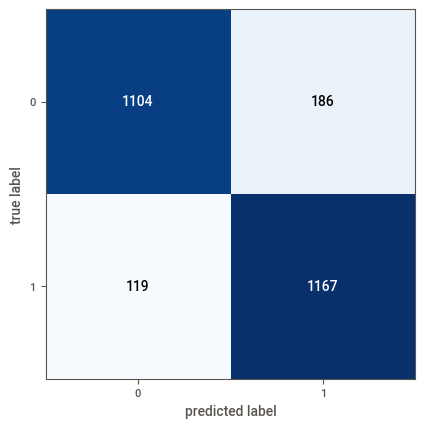

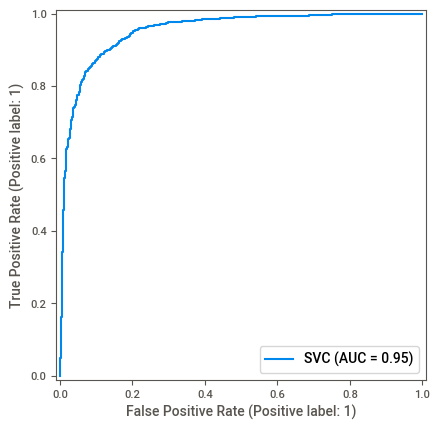

In [ ]:
# Support Vector Machine
model=SVC()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc2 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc2))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)


Accuracy = 0.9297360248447205
ROC Area under Curve = 0.9297364582203094
              precision    recall  f1-score   support

           0    0.93018   0.92946   0.92982      1290
           1    0.92929   0.93002   0.92965      1286

    accuracy                        0.92974      2576
   macro avg    0.92974   0.92974   0.92974      2576
weighted avg    0.92974   0.92974   0.92974      2576



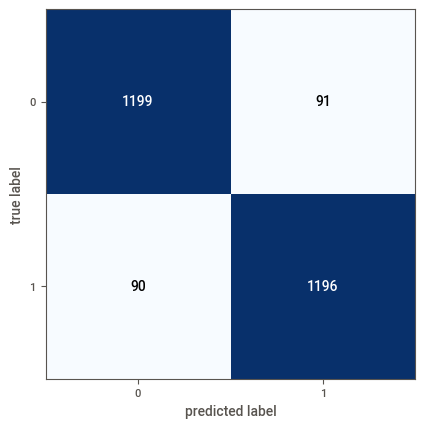

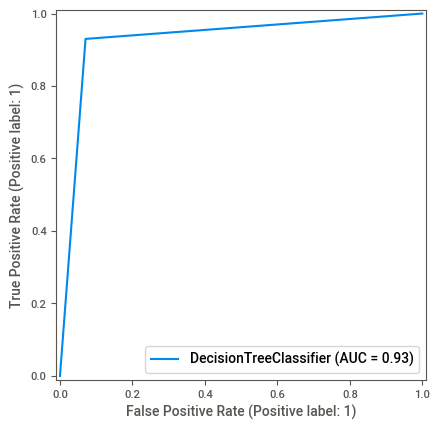

In [ ]:
# Decision Tree
model=DecisionTreeClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc3 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc3))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.9743788819875776
ROC Area under Curve = 0.9743981096362737
              precision    recall  f1-score   support

           0    0.98649   0.96202   0.97410      1290
           1    0.96282   0.98678   0.97465      1286

    accuracy                        0.97438      2576
   macro avg    0.97465   0.97440   0.97438      2576
weighted avg    0.97467   0.97438   0.97438      2576



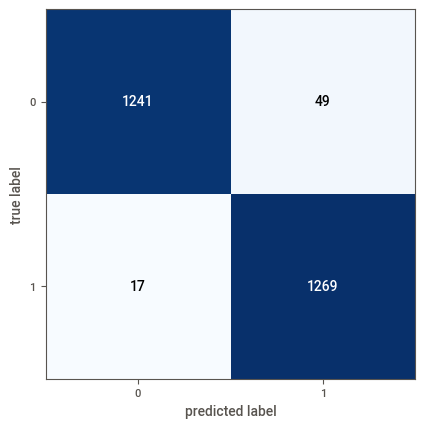

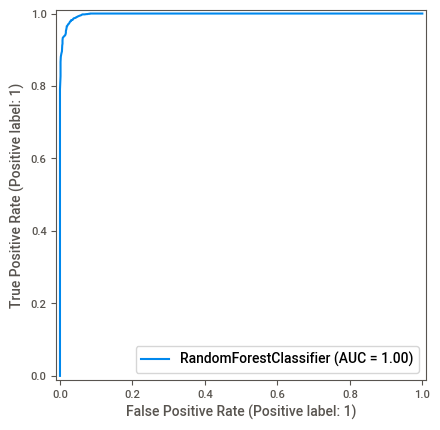

In [ ]:
# random forest
model=RandomForestClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc4 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc4))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.968555900621118
ROC Area under Curve = 0.9685913896825684
              precision    recall  f1-score   support

           0    0.99106   0.94574   0.96787      1290
           1    0.94796   0.99145   0.96921      1286

    accuracy                        0.96856      2576
   macro avg    0.96951   0.96859   0.96854      2576
weighted avg    0.96954   0.96856   0.96854      2576



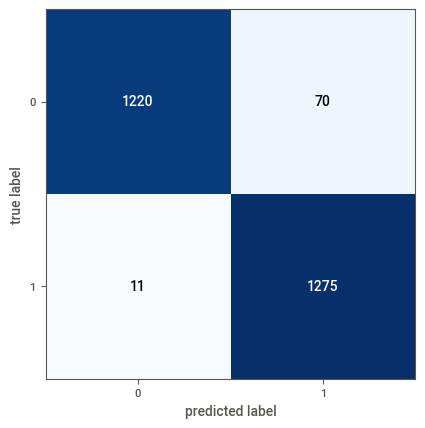

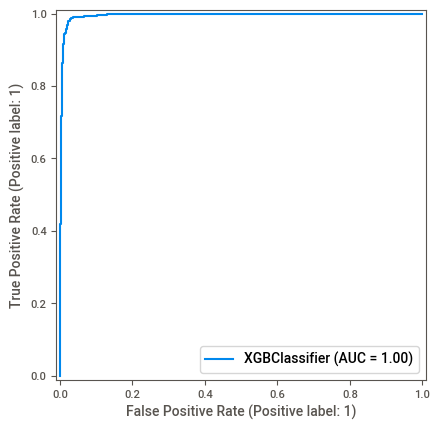

In [ ]:
# XGBoost
model=XGBClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc5 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc5))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.8645186335403726
ROC Area under Curve = 0.8645671332296527
              precision    recall  f1-score   support

           0    0.88916   0.83333   0.86034      1290
           1    0.84272   0.89580   0.86845      1286

    accuracy                        0.86452      2576
   macro avg    0.86594   0.86457   0.86440      2576
weighted avg    0.86598   0.86452   0.86439      2576



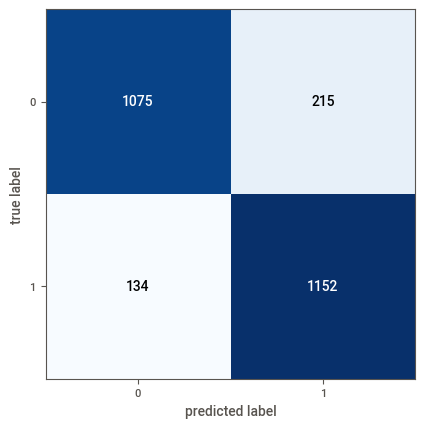

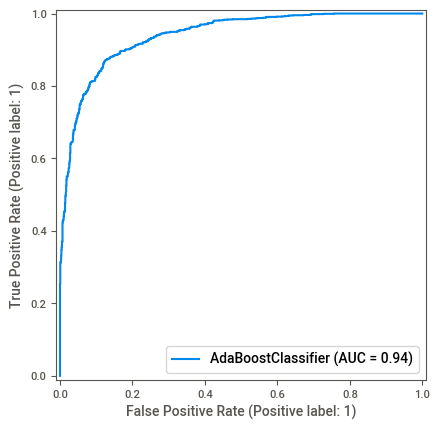

In [ ]:
# adaboost
model=AdaBoostClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc6 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc6))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

# **Auto ML**

In [ ]:
pip install pycaret


In [ ]:
from pycaret.classification import *

In [ ]:
from pycaret.classification import setup


In [ ]:
print(df.dtypes)

Churn                            int64
Tenure                         float64
PreferredLoginDevice             int64
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode             int64
Gender                           int64
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                 int64
SatisfactionScore                int64
MaritalStatus                    int64
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object


In [ ]:
print(df.head())


   Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0                     1         3              6.0   
1      1     0.0                     2         1              8.0   
2      1     0.0                     2         1             30.0   
3      1     0.0                     2         3             15.0   
4      1     0.0                     2         1             12.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                     4       0             3.0                         3   
1                     6       1             3.0                         4   
2                     4       1             2.0                         4   
3                     4       1             2.0                         4   
4                     0       1             3.0                         3   

   PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                 2                  2          

In [ ]:
import numpy as np

# Set numerical precision options to avoid underflow
np.seterr(under='ignore')

# Now, you can try calling the setup() function again
model_setup = setup(data=df, target='Churn', train_size=0.7)


,Description,Value
0,Session id,5023
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(5155, 19)"
4,Transformed data shape,"(5155, 19)"
5,Transformed train set shape,"(3608, 19)"
6,Transformed test set shape,"(1547, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# model training and selection
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9604,0.9725,0.8294,0.9267,0.8750,0.8516,0.8536,0.1310
lightgbm,Light Gradient Boosting Machine,0.9579,0.9743,0.8046,0.9358,0.8646,0.8399,0.8437,0.2550
et,Extra Trees Classifier,0.9559,0.9864,0.7715,0.9574,0.8541,0.8285,0.8354,0.4570
rf,Random Forest Classifier,0.9507,0.9806,0.7582,0.9352,0.8371,0.8084,0.8148,0.4600
dt,Decision Tree Classifier,0.9263,0.8736,0.7945,0.7725,0.7827,0.7384,0.7389,0.0840
gbc,Gradient Boosting Classifier,0.9105,0.9298,0.5811,0.8301,0.6814,0.6317,0.6464,0.5010
ada,Ada Boost Classifier,0.8883,0.8961,0.5331,0.7274,0.6114,0.5486,0.5596,0.3340
lda,Linear Discriminant Analysis,0.8750,0.8519,0.3992,0.7332,0.5146,0.4504,0.4790,0.0400
lr,Logistic Regression,0.8747,0.8589,0.4189,0.7132,0.5267,0.4604,0.4825,1.2130
ridge,Ridge Classifier,0.8600,0.0000,0.1855,0.9019,0.3064,0.2646,0.3699,0.0340


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# evaluate trained model
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…